# Explanation of this Notebook

The goal of this notebook is to explore the dataset and have better comprehesion of it

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../data/raw/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

# Afficher les 5 premières lignes
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## DF_Info & DF_Describe

In [3]:
# Aperçu général du dataset
df.info()

# Résumé statistique des données numériques
df.describe()

# Affichage des colonnes et de leurs types
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


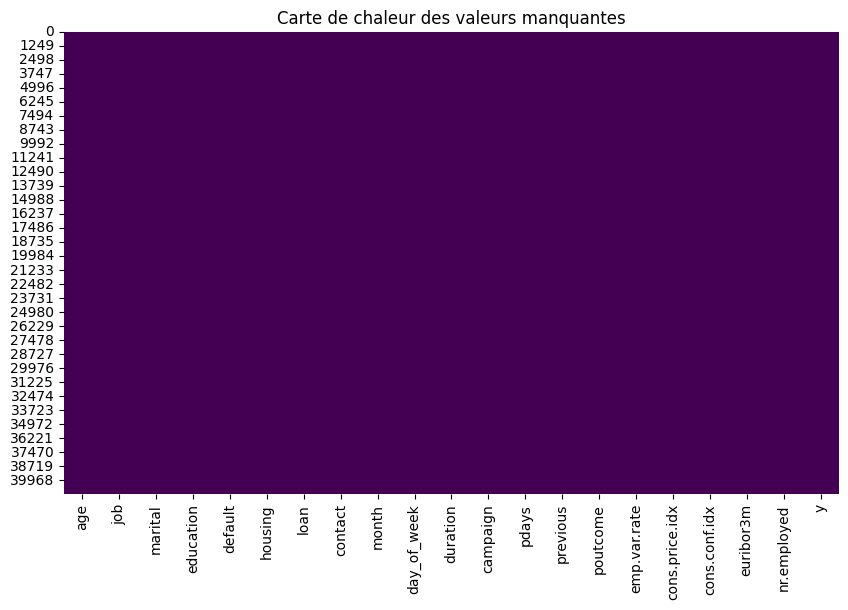

In [4]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print(missing_values)

# Visualiser les valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Carte de chaleur des valeurs manquantes")
plt.show()


In [5]:
# Liste des variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns
print("Variables catégorielles :", categorical_cols)

# Afficher les valeurs uniques pour chaque variable catégorielle
for col in categorical_cols:
    print(f"\n{col} : {df[col].unique()}")


Variables catégorielles : Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital : ['married' 'single' 'divorced' 'unknown']

education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default : ['no' 'unknown' 'yes']

housing : ['no' 'yes' 'unknown']

loan : ['no' 'yes' 'unknown']

contact : ['telephone' 'cellular']

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome : ['nonexistent' 'failure' 'success']

y : ['no' 'yes']


C:\Users\yskon\AppData\Local\Temp\ipykernel_13168\286665733.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
C:\Users\yskon\AppData\Local\Temp\ipykernel_13168\286665733.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
C:\Users\yskon\AppData\Local\Temp\ipykernel_13168\286665733.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts()

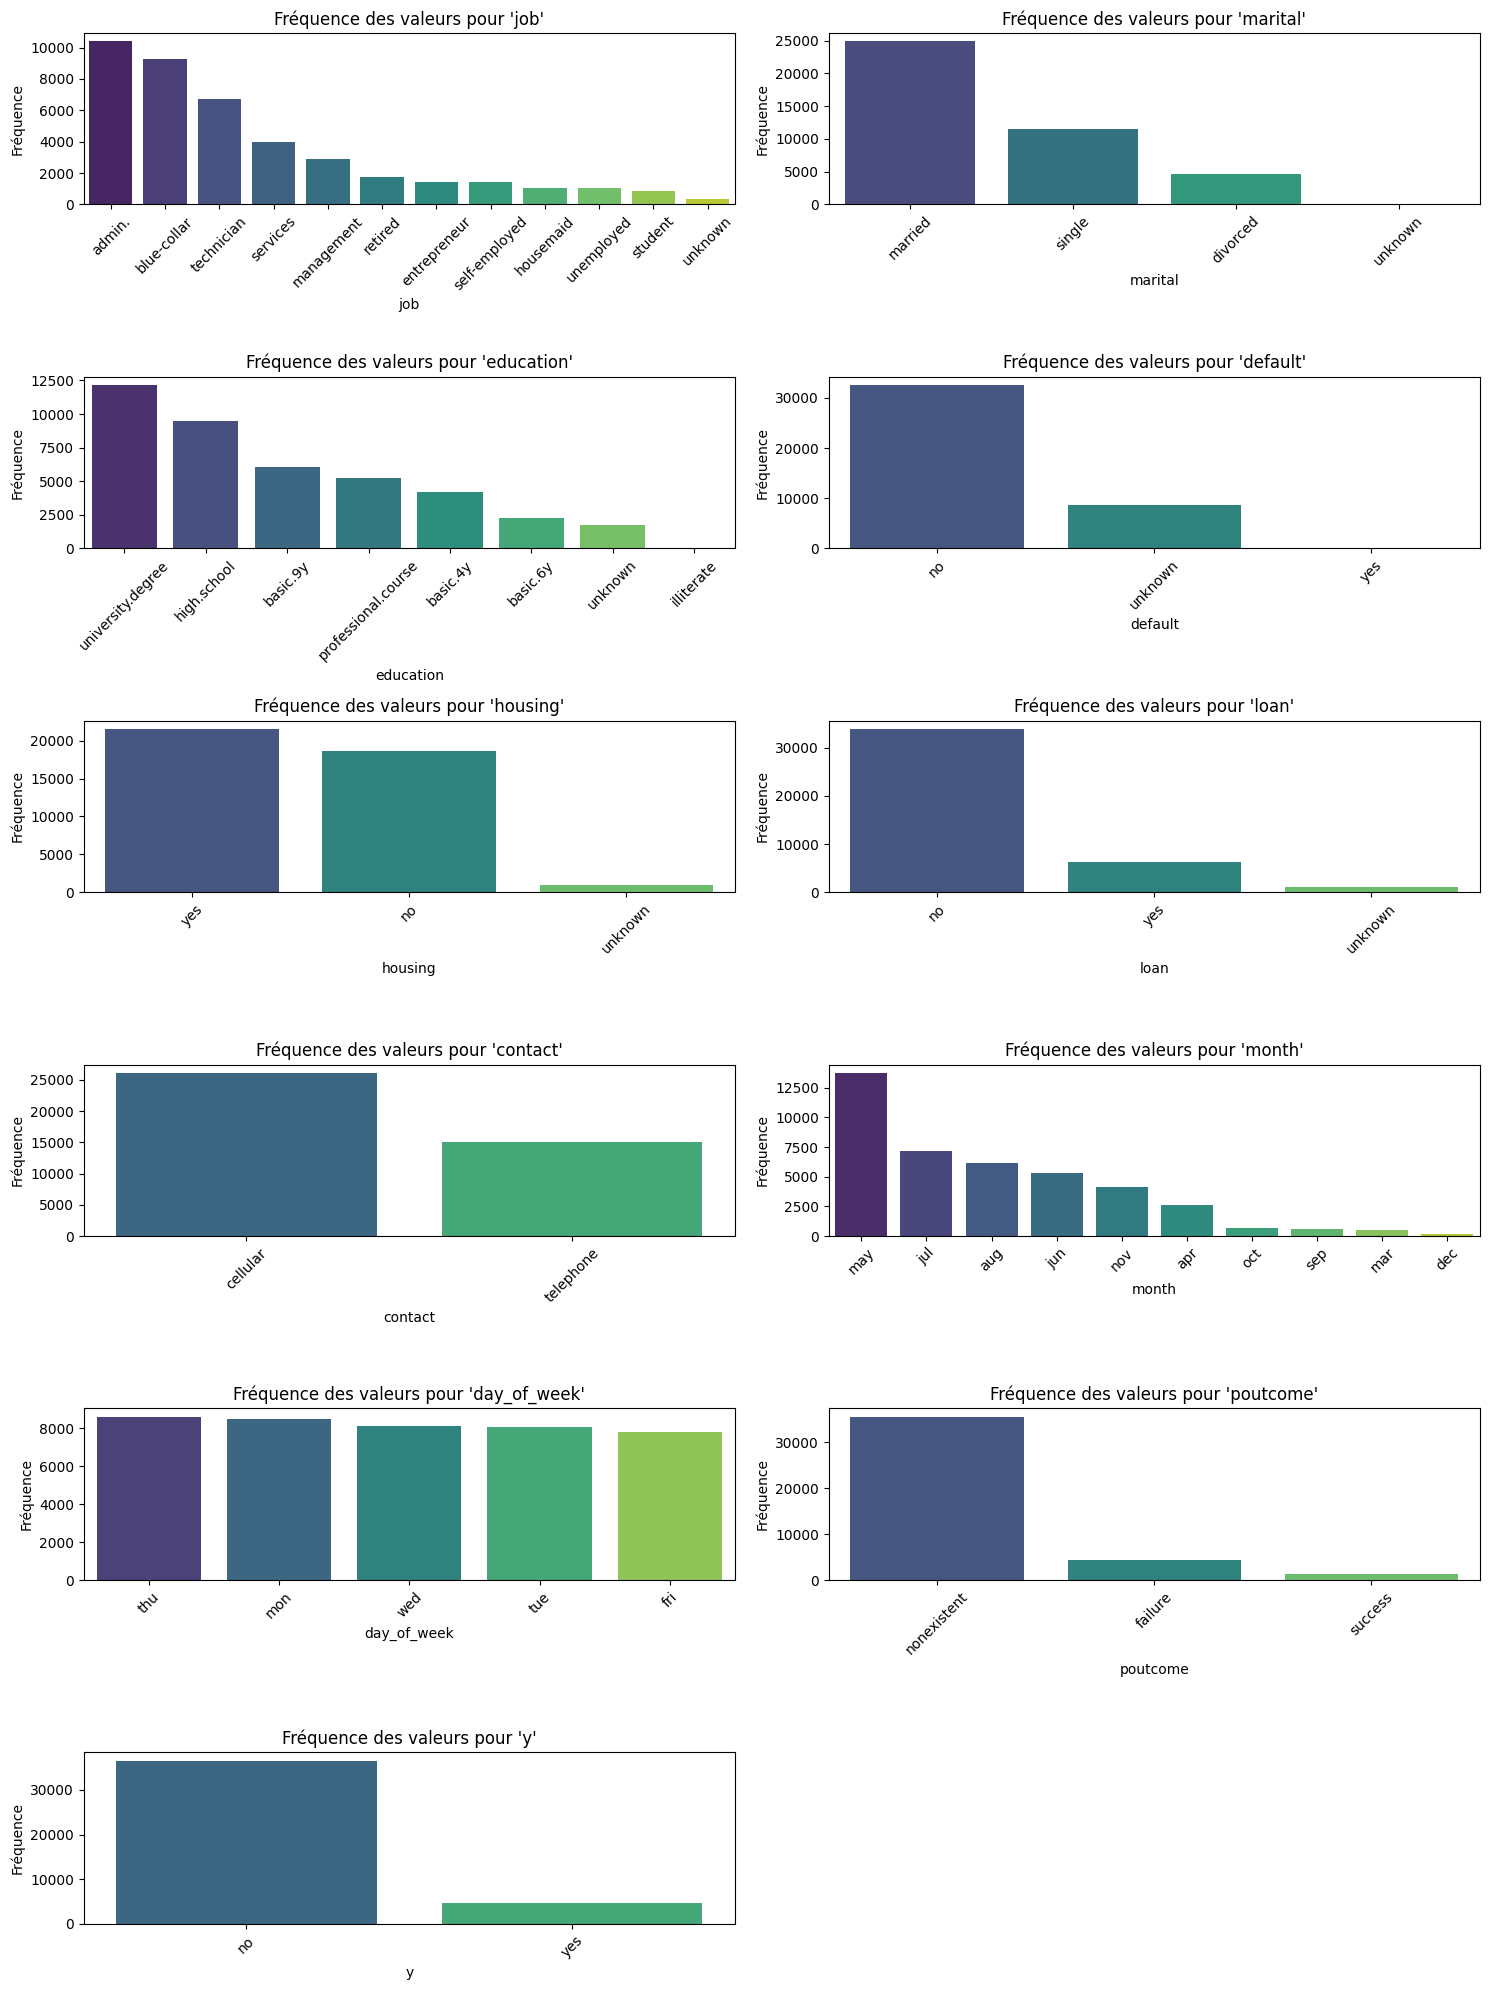

In [6]:

# Définir la taille de la figure
plt.figure(figsize=(15, 20))

# Parcourir chaque variable catégorielle et tracer un graphique de fréquence
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 2 + 1, 2, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Fréquence des valeurs pour '{col}'")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

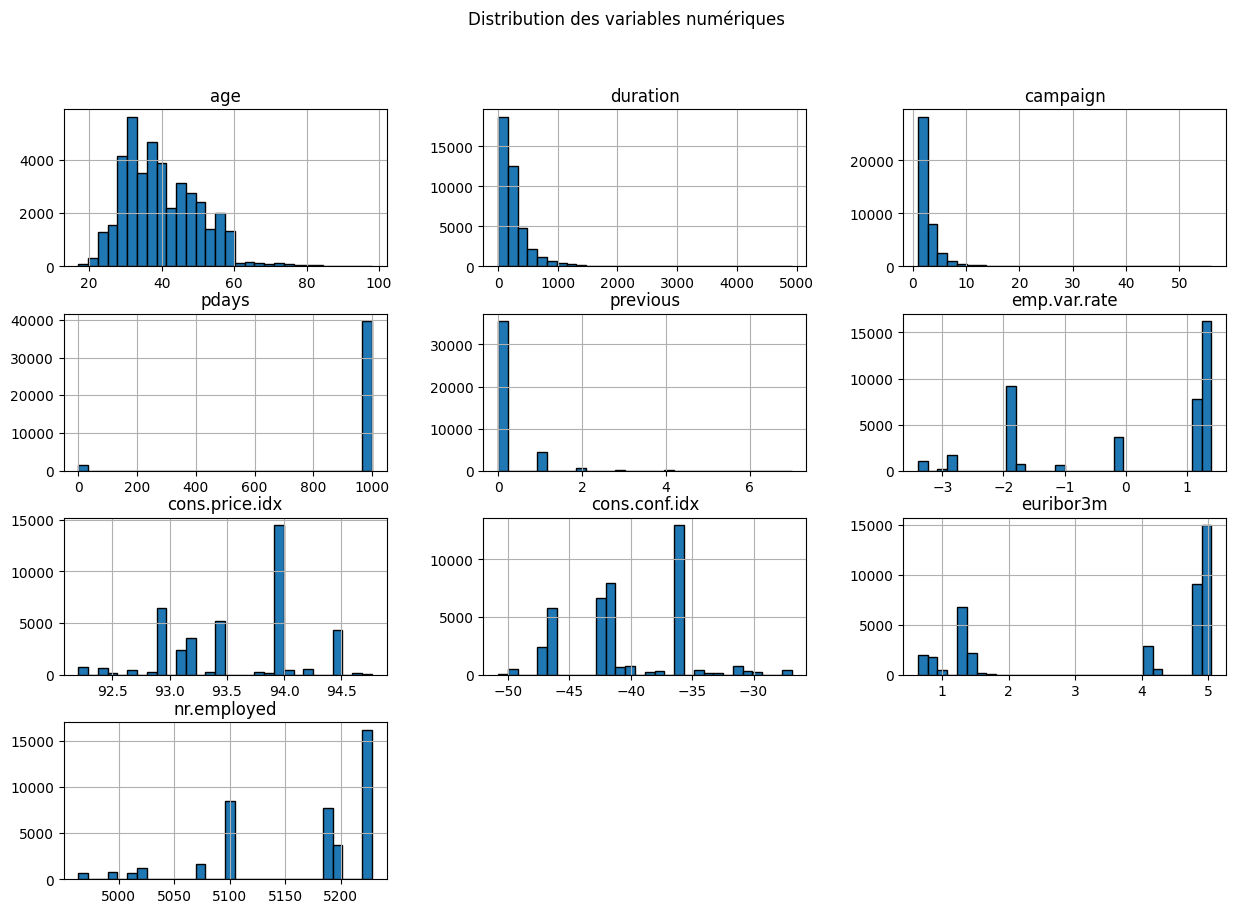

In [7]:
# Afficher les histogrammes des variables numériques
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables numériques")
plt.show()


y
no     36548
yes     4640
Name: count, dtype: int64


C:\Users\yskon\AppData\Local\Temp\ipykernel_13168\920719842.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


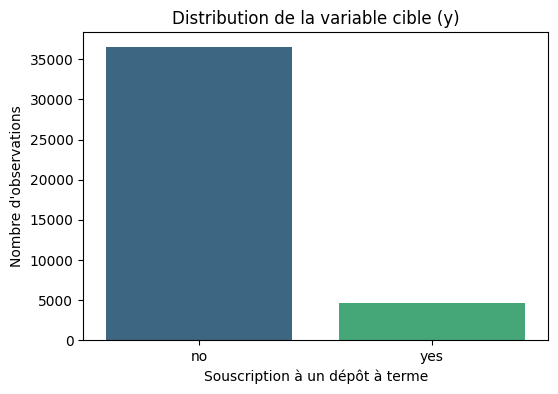

In [8]:
# Compter les valeurs de la variable cible
target_counts = df['y'].value_counts()
print(target_counts)

# Visualiser la distribution de la variable cible
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title("Distribution de la variable cible (y)")
plt.xlabel("Souscription à un dépôt à terme")
plt.ylabel("Nombre d'observations")
plt.show()


1. Analyse de la variable cible (y)

    La variable cible est très déséquilibrée :
        La majorité des clients ont répondu "no" (ne pas souscrire au dépôt à terme).
        Très peu de clients ont répondu "yes" (souscription).
    Conséquence : Nous devons prendre en compte cet déséquilibre de classe lors de la modélisation (exemple : ajuster les poids des classes, utiliser des techniques de sur-échantillonnage comme SMOTE, ou utiliser des métriques adaptées comme le F1-score ou le Recall).

2. Analyse des variables catégorielles

    Job : Les catégories "admin.", "blue-collar" et "technician" sont les plus fréquentes. Les autres catégories, comme "student" ou "unemployed", sont moins représentées.
    
    Marital : La majorité des clients sont "married". Les clients "divorced" et "single" sont moins fréquents.
    
    Education : Les clients ayant un "university degree" et un "high school" sont les plus nombreux. Il y a une proportion non négligeable d'éducation "unknown", ce qui peut nécessiter un traitement spécifique.
    
    Default, Housing, Loan : La plupart des clients n'ont pas de crédits en défaut, et environ la moitié ont un prêt immobilier ("housing loan").
    
    Contact : La majorité des contacts sont réalisés via "cellular", tandis que "telephone" est moins fréquent.
    
    Month et Day of Week : La distribution des mois montre un pic important en "May", suivi de "July" et "August". Cela peut indiquer une saisonnalité dans les campagnes marketing.
    
    Poutcome : La plupart des clients n'ont pas participé aux campagnes précédentes ("nonexistent").

Observations générales :

    Les variables catégorielles présentent une forte hétérogénéité, et certaines catégories sont rares ("unknown"), ce qui peut influencer la performance des modèles.
    Il peut être nécessaire d'encoder les variables catégorielles avec One-Hot Encoding ou d'utiliser des techniques de Target Encoding.

3. Analyse des variables numériques

    Age : La distribution est asymétrique à droite, avec un pic autour de 30-40 ans. Il y a quelques clients plus âgés (> 80 ans).
    
    Duration : Distribution fortement asymétrique à droite. La majorité des durées sont courtes (inférieures à 500 secondes). Cette variable est hautement corrélée avec la cible et ne doit pas être utilisée pour la prédiction dans un contexte réaliste.
    
    Campaign : La plupart des clients n'ont été contactés qu'une seule fois durant la campagne.
    
    Pdays : Il y a un pic massif à la valeur 999, ce qui signifie que le client n'a pas été contacté auparavant. Cela crée une variable binaire implicite (contacté ou non).
    
    Previous : La majorité des clients n'ont pas été contactés lors de campagnes précédentes, ce qui est aligné avec "pdays".
    Indices économiques (emp.var.rate, cons.price.idx, euribor3m, nr.employed) : Ces variables montrent des variations distinctes, reflétant probablement les conditions macroéconomiques durant la période d'étude.

Observations générales :

    Plusieurs variables numériques ont des distributions asymétriques ou contiennent des valeurs atypiques (outliers).
    Pdays nécessite un traitement particulier (par exemple, créer une variable binaire).
    Les indices économiques peuvent nécessiter une normalisation ou une standardisation pour une meilleure convergence des modèles.

Prochaines étapes :

    Traitement des valeurs manquantes : Remplacer les "unknown" par des valeurs imputées ou une catégorie dédiée.
    Encodage des variables catégorielles : Utiliser One-Hot Encoding ou Target Encoding.
    Normalisation/Standardisation : Appliquer une normalisation sur les variables numériques avec des distributions très asymétriques.

## Imputation

 on impute less valeurs unknown par les valeurs les plus cohérentes pour ces denières via un knn pour conserver une cohérence

In [9]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Remplacer 'unknown' par NaN dans tout le DataFrame
df.replace('unknown', np.nan, inplace=True)

# Séparer les colonnes numériques et catégorielles
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encodage Ordinal temporaire pour les colonnes catégorielles
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols].astype(str))

# Imputation KNN sur l'ensemble du DataFrame
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Conversion inverse pour restaurer les catégories
df_imputed[categorical_cols] = ordinal_encoder.inverse_transform(df_imputed[categorical_cols])

# Remplacer explicitement les chaînes "nan" par np.nan après l'inverse-transform
for col in categorical_cols:
    df_imputed[col] = df_imputed[col].apply(lambda x: np.nan if str(x) == "nan" else x)

# Vérifier les colonnes avec des NaN
cols_with_nan = df_imputed[categorical_cols].columns[df_imputed[categorical_cols].isna().any()]

if len(cols_with_nan) > 0:
    print(f"Colonnes avec valeurs NaN après la première imputation : {list(cols_with_nan)}")

    # Ré-encoder les colonnes avec des NaN
    df_imputed[cols_with_nan] = ordinal_encoder.fit_transform(df_imputed[cols_with_nan].astype(str))

    # Quatrième passe d'imputation KNN sur les colonnes avec des NaN
    knn_imputer_final = KNNImputer(n_neighbors=5)
    df_imputed[cols_with_nan] = pd.DataFrame(
        knn_imputer_final.fit_transform(df_imputed[cols_with_nan]),
        columns=cols_with_nan
    )

    # Conversion inverse pour restaurer les catégories après la quatrième imputation
    df_imputed[cols_with_nan] = ordinal_encoder.inverse_transform(df_imputed[cols_with_nan])

# Vérifier les valeurs manquantes après la quatrième imputation
print("Vérification des valeurs manquantes après la quatrième imputation :")
print(df_imputed.isnull().sum())

# Afficher les catégories uniques pour chaque variable catégorielle
for col in categorical_cols:
    print(f"{col} : {df_imputed[col].unique()}")

# Afficher les 5 premières lignes des données imputées
print(df_imputed.head())


Colonnes avec valeurs NaN après la première imputation : ['job', 'marital', 'education', 'default', 'housing', 'loan']
Vérification des valeurs manquantes après la quatrième imputation :
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'nan' 'entrepreneur' 'student']
marital : ['married' 'single' 'divorced' 'nan']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'nan' 'university.degree' 'illiterate']
default : ['no' 'nan' 'yes']
housing : ['no' 'yes' 'nan']


In [10]:
# Calculer la proportion de lignes avec au moins une valeur NaN
total_rows = len(df_imputed)
rows_with_nan = df_imputed.isnull().any(axis=1).sum()
proportion_with_nan = rows_with_nan / total_rows * 100

print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de lignes contenant au moins un NaN : {rows_with_nan}")
print(f"Proportion de lignes avec des NaN : {proportion_with_nan:.2f}%")


Nombre total de lignes : 41188
Nombre de lignes contenant au moins un NaN : 0
Proportion de lignes avec des NaN : 0.00%


In [11]:
# Compter les lignes contenant la chaîne de caractères 'nan'
rows_with_string_nan = (df_imputed.astype(str) == 'nan').any(axis=1).sum()
proportion_with_string_nan = rows_with_string_nan / total_rows * 100

print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de lignes contenant la chaîne 'nan' : {rows_with_string_nan}")
print(f"Proportion de lignes avec la chaîne 'nan' : {proportion_with_string_nan:.2f}%")


Nombre total de lignes : 41188
Nombre de lignes contenant la chaîne 'nan' : 10700
Proportion de lignes avec la chaîne 'nan' : 25.98%


In [12]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Step 1: Replace 'unknown' and the string 'nan' with np.nan explicitly
df.replace(['unknown', 'nan'], np.nan, inplace=True)

# Step 2: Verify if replacement worked
print(f"Initial check - Count of 'nan' strings: {(df.astype(str) == 'nan').any(axis=1).sum()}")

# Step 3: Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Step 4: Encode categorical columns using OrdinalEncoder with handling of unknown categories
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols].astype(str))

# Step 5: Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Step 6: Replace any lingering string 'nan' with np.nan once more after imputation
df_imputed.replace('nan', np.nan, inplace=True)

# Step 7: Inverse transform to restore original categorical values
try:
    df_imputed[categorical_cols] = ordinal_encoder.inverse_transform(df_imputed[categorical_cols])
except ValueError as e:
    print(f"Error during inverse transform: {e}")

# Step 8: Verify if any 'nan' or NaN values remain
string_nan_count = (df_imputed.astype(str) == 'nan').any(axis=1).sum()
numeric_nan_count = df_imputed.isnull().sum().sum()

print(f"Final check - Count of 'nan' strings: {string_nan_count}")
print(f"Final check - Count of NaN values: {numeric_nan_count}")

# Display the first few rows of the cleaned DataFrame
print(df_imputed.head())


Initial check - Count of 'nan' strings: 0
Error during inverse transform: at least one array or dtype is required
Final check - Count of 'nan' strings: 0
Final check - Count of NaN values: 0
    age  job  marital  education  default  housing  loan  contact  month  \
0  56.0  3.0      1.0        0.0      1.0      1.0   1.0      1.0    6.0   
1  57.0  8.0      1.0        3.0      0.0      1.0   1.0      1.0    6.0   
2  37.0  8.0      1.0        3.0      1.0      2.0   1.0      1.0    6.0   
3  40.0  0.0      1.0        1.0      1.0      1.0   1.0      1.0    6.0   
4  56.0  8.0      1.0        3.0      1.0      1.0   2.0      1.0    6.0   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0          1.0  ...       1.0  999.0       0.0       1.0           1.1   
1          1.0  ...       1.0  999.0       0.0       1.0           1.1   
2          1.0  ...       1.0  999.0       0.0       1.0           1.1   
3          1.0  ...       1.0  999.0       0.0       1.0

In [13]:
# Compter les lignes contenant la chaîne de caractères 'nan'
rows_with_string_nan = (df_imputed.astype(str) == 'nan').any(axis=1).sum()
proportion_with_string_nan = rows_with_string_nan / total_rows * 100

print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de lignes contenant la chaîne 'nan' : {rows_with_string_nan}")
print(f"Proportion de lignes avec la chaîne 'nan' : {proportion_with_string_nan:.2f}%")


Nombre total de lignes : 41188
Nombre de lignes contenant la chaîne 'nan' : 0
Proportion de lignes avec la chaîne 'nan' : 0.00%


## Encoding & Normalization

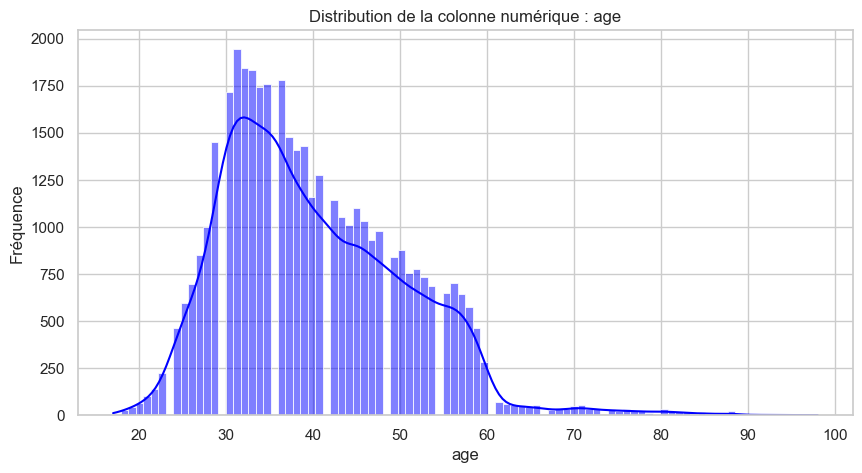

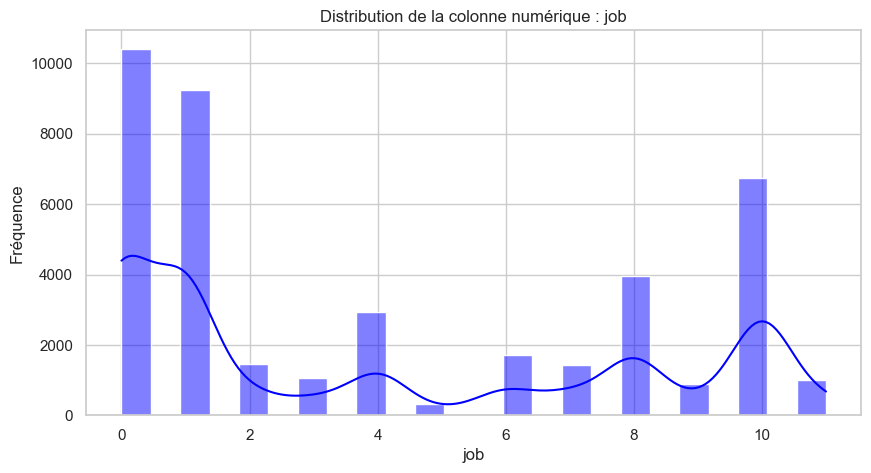

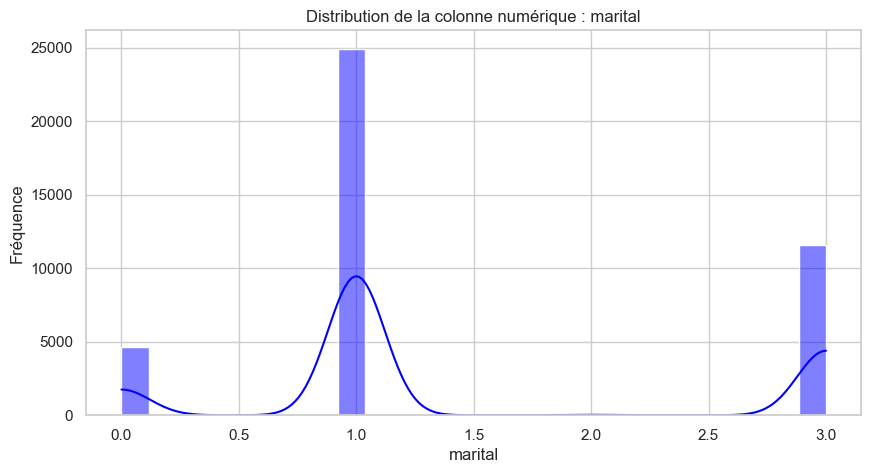

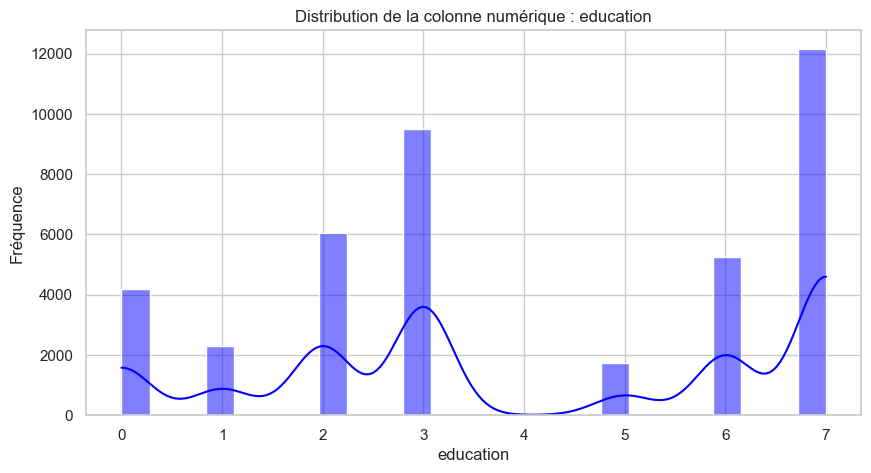

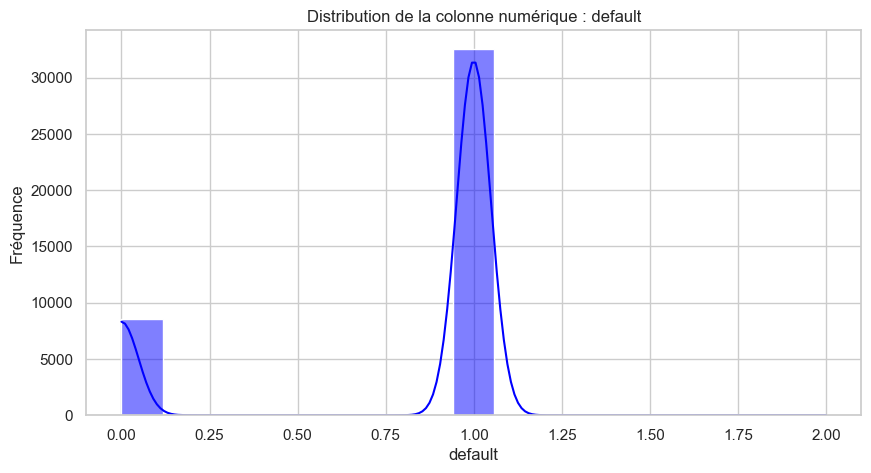

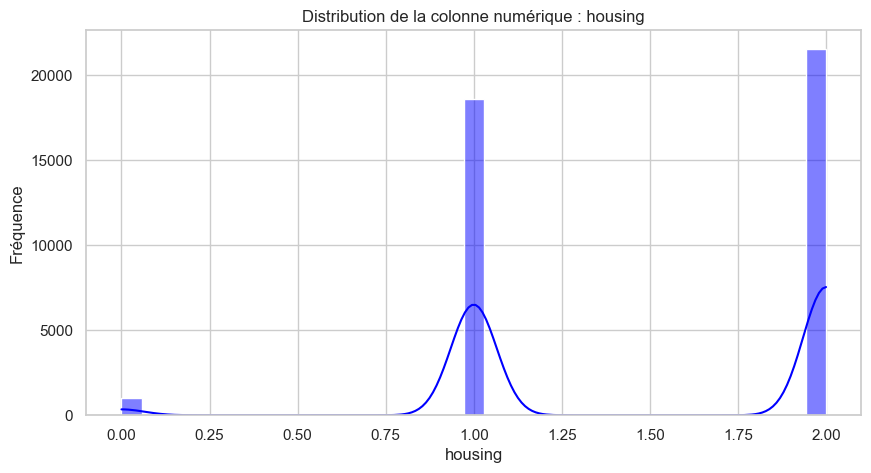

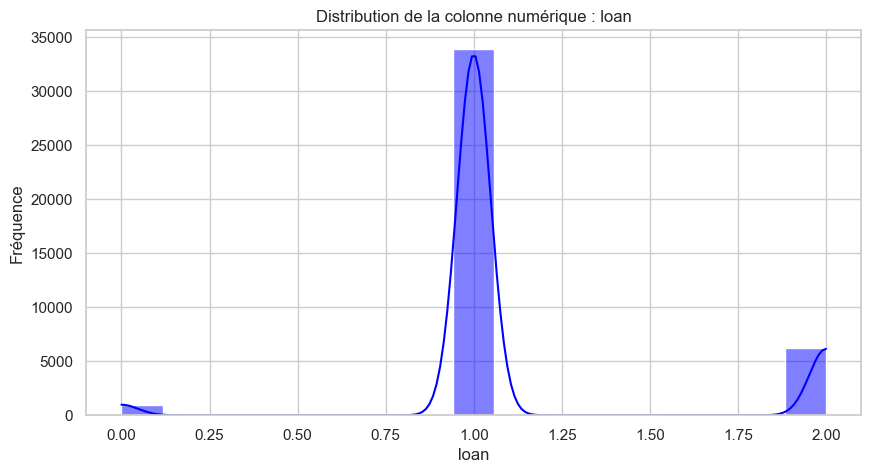

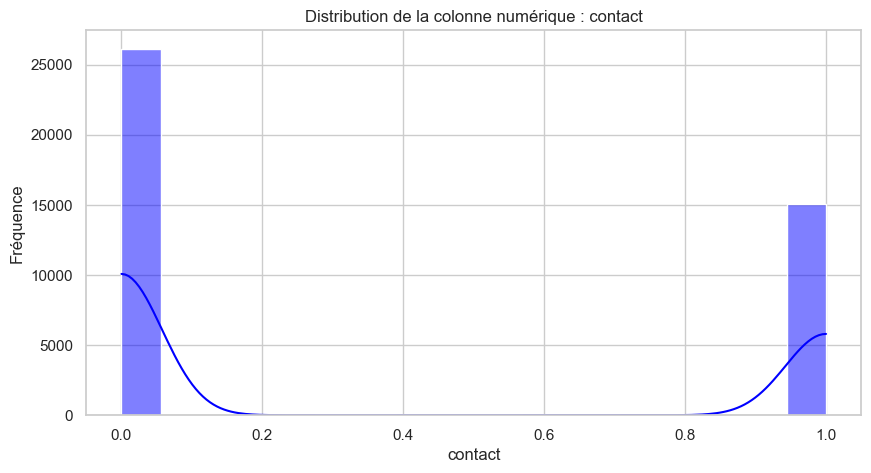

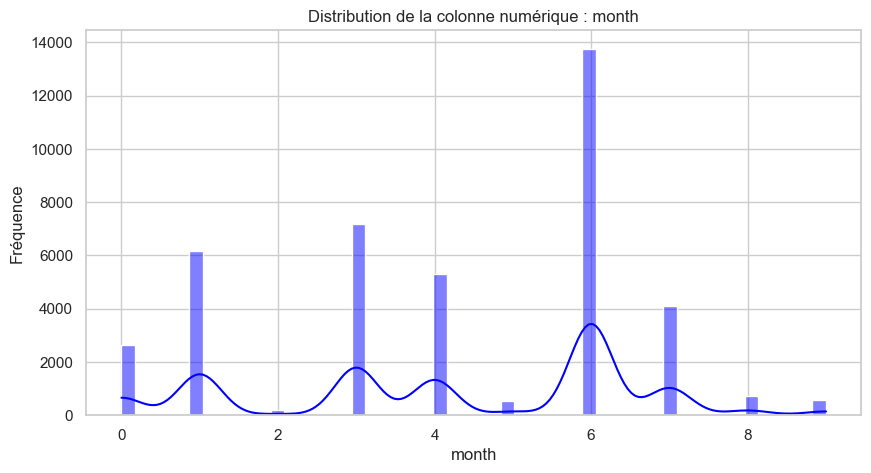

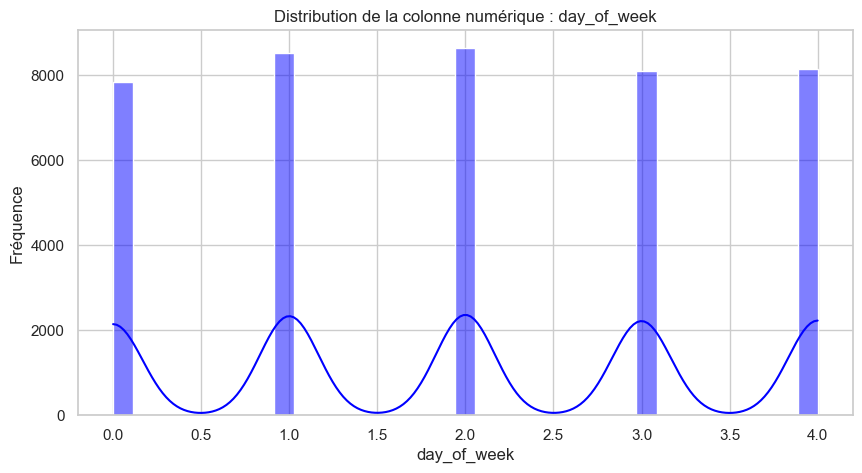

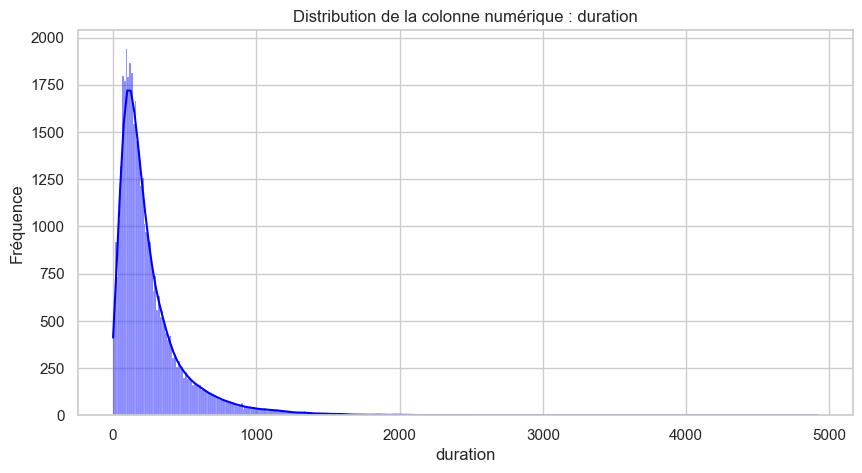

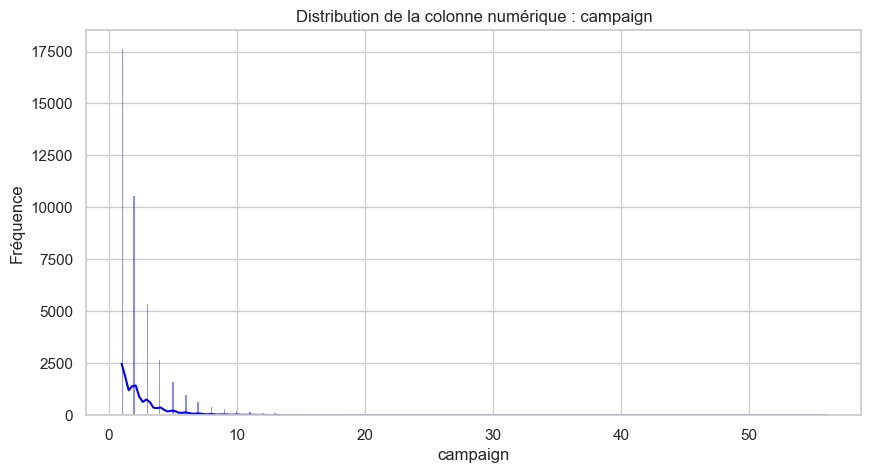

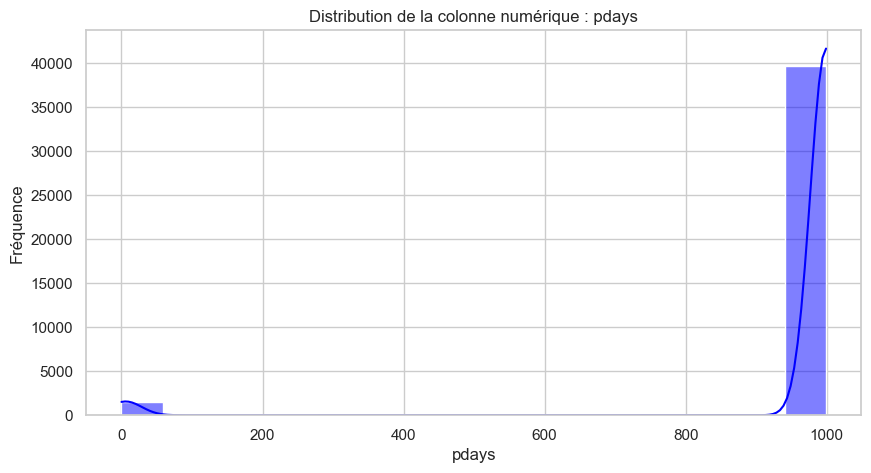

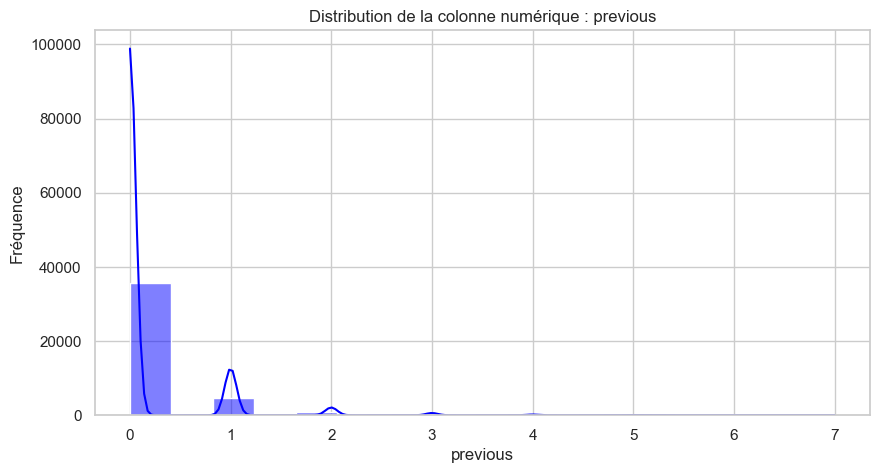

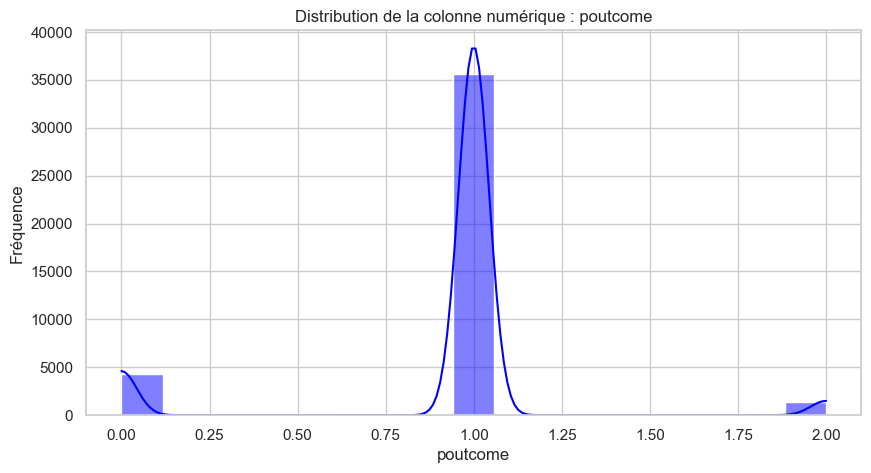

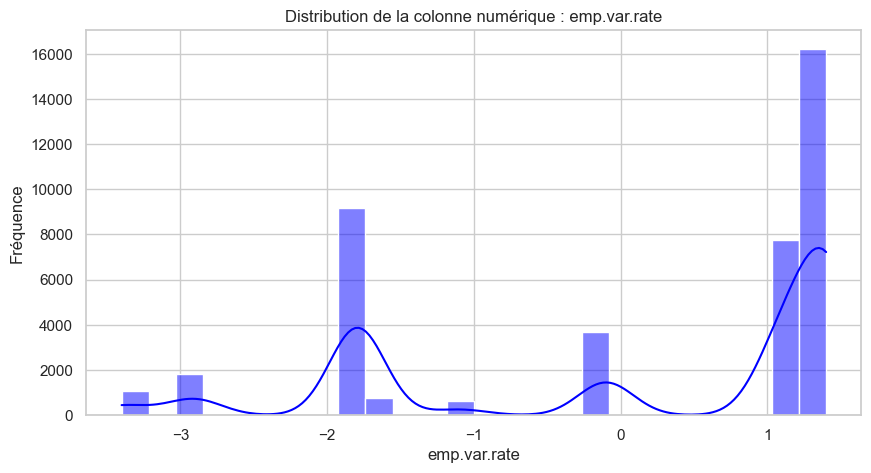

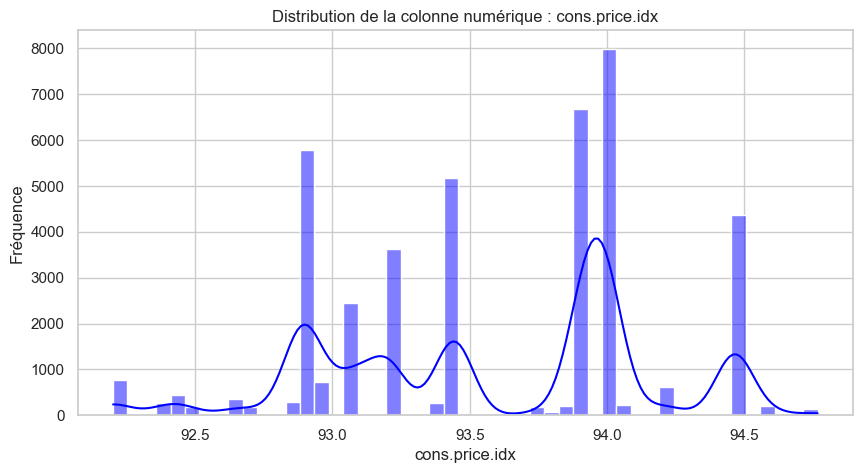

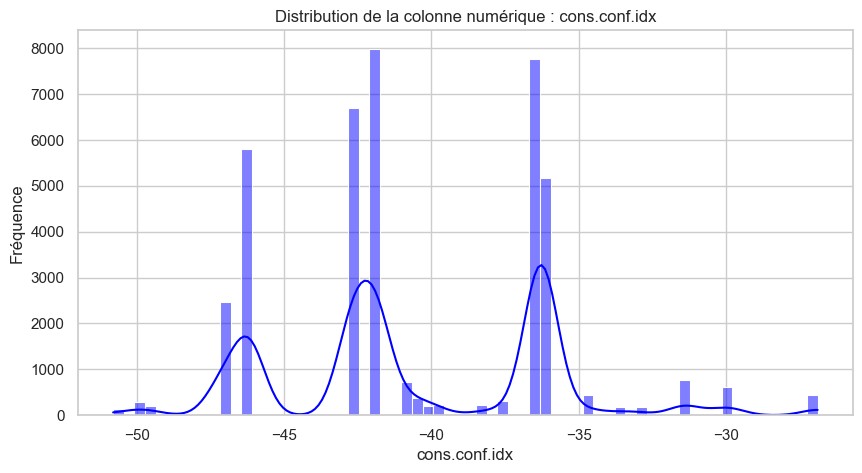

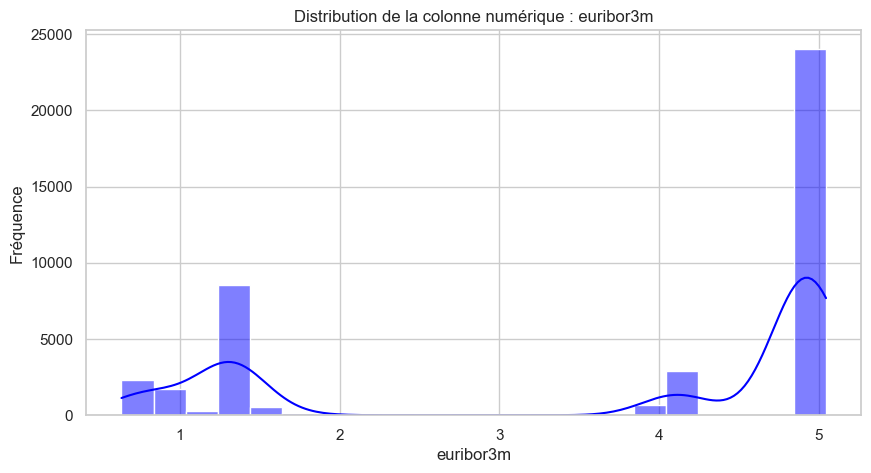

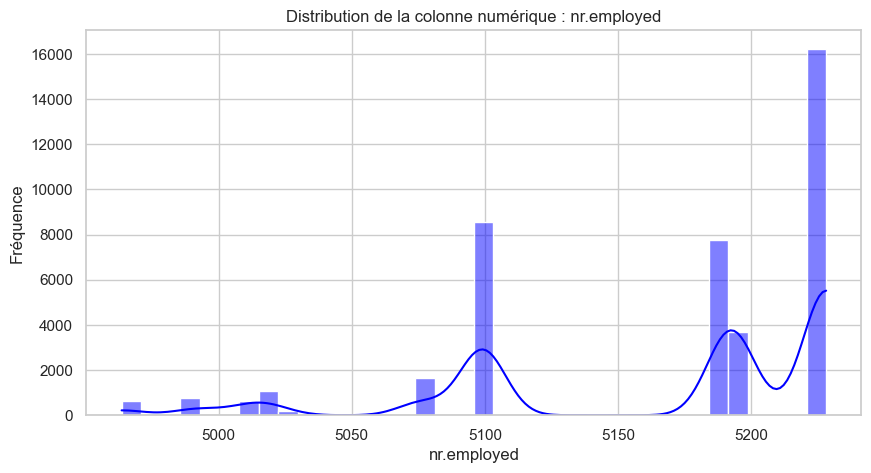

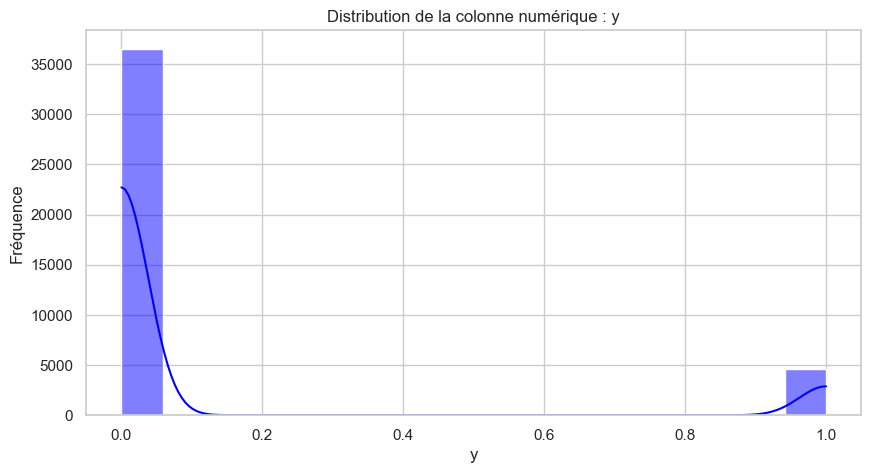

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Séparer les colonnes numériques et catégorielles
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_imputed.select_dtypes(include=['object']).columns

# Définir le style de Seaborn
sns.set(style="whitegrid")

# Tracer la distribution des colonnes numériques
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_imputed, x=col, kde=True, color='blue')
    plt.title(f"Distribution de la colonne numérique : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

# Tracer la distribution des colonnes catégorielles
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_imputed, x=col, palette='viridis', order=df_imputed[col].value_counts().index)
    plt.title(f"Distribution de la colonne catégorielle : {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'occurrences")
    plt.xticks(rotation=45)
    plt.show()


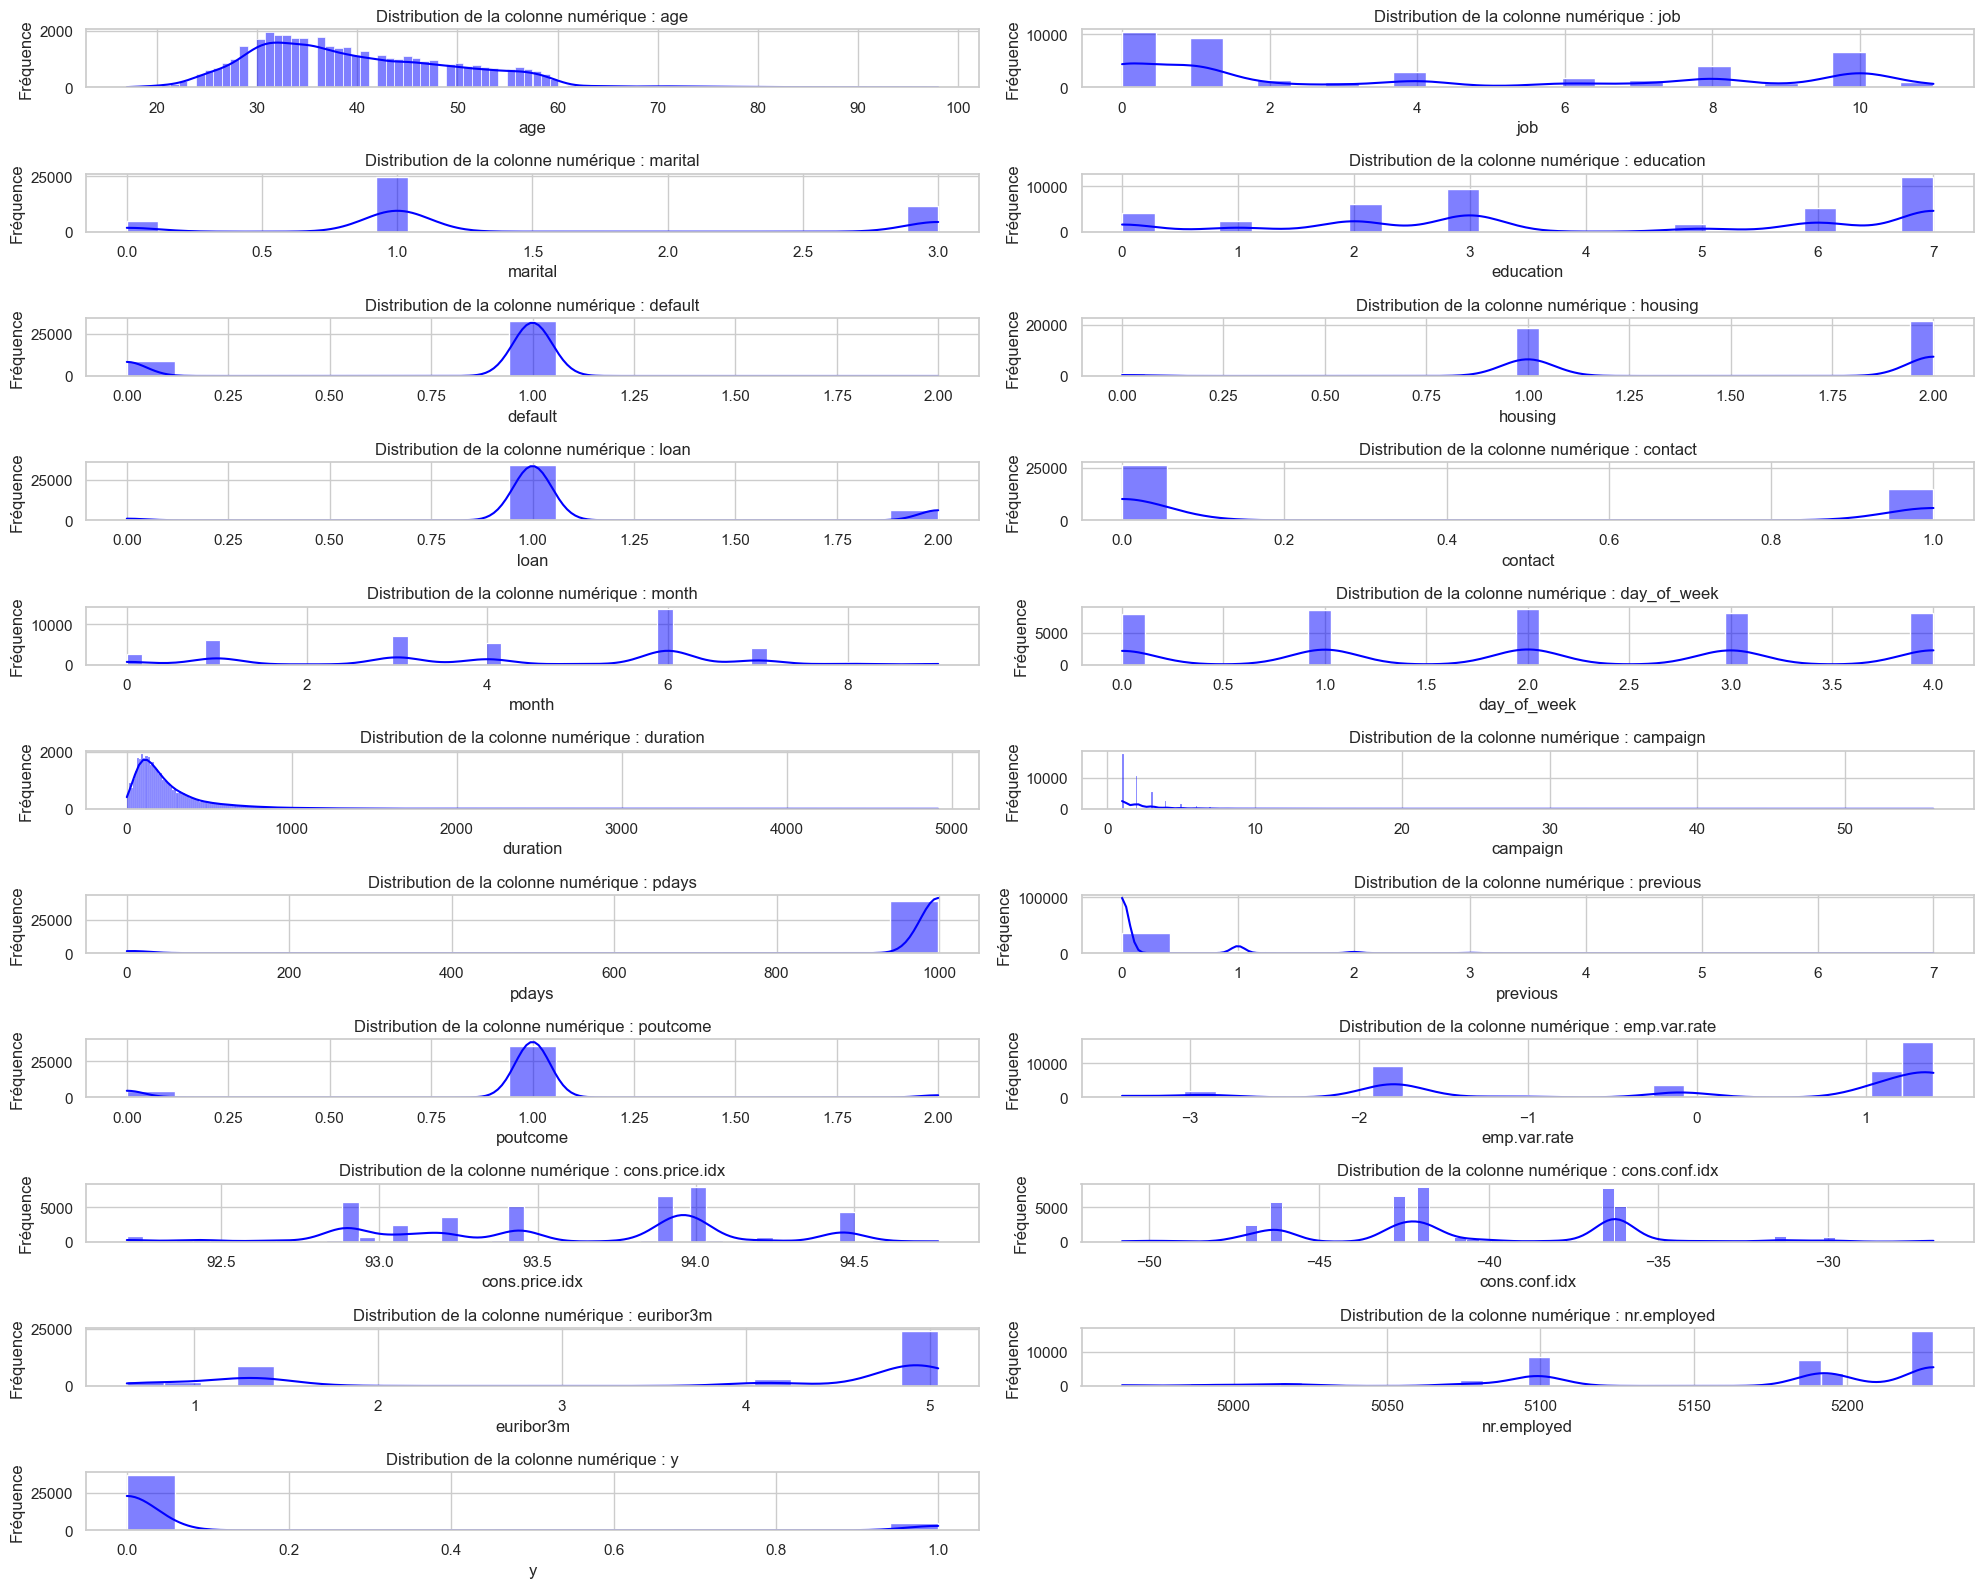

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Séparer les colonnes numériques et catégorielles
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_imputed.select_dtypes(include=['object']).columns

# Définir la taille de la figure et le style
plt.figure(figsize=(20, 30))
sns.set(style="whitegrid")

# Tracer la distribution des colonnes numériques
num_plots = len(numeric_cols)
cat_plots = len(categorical_cols)
total_plots = num_plots + cat_plots

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(total_plots, 2, i)
    sns.histplot(data=df_imputed, x=col, kde=True, color='blue')
    plt.title(f"Distribution de la colonne numérique : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

# Tracer la distribution des colonnes catégorielles
for j, col in enumerate(categorical_cols, 1):
    plt.subplot(total_plots, 2, num_plots + j)
    sns.countplot(data=df_imputed, x=col, palette='viridis', order=df_imputed[col].value_counts().index)
    plt.title(f"Distribution de la colonne catégorielle : {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'occurrences")
    plt.xticks(rotation=45)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


Valeurs manquantes après nettoyage :
age                0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
y                  0
job_1.0            0
job_2.0            0
job_3.0            0
job_4.0            0
job_5.0            0
job_6.0            0
job_7.0            0
job_8.0            0
job_9.0            0
job_10.0           0
job_11.0           0
marital_1.0        0
marital_2.0        0
marital_3.0        0
education_1.0      0
education_2.0      0
education_3.0      0
education_4.0      0
education_5.0      0
education_6.0      0
education_7.0      0
default_1.0        0
default_2.0        0
housing_1.0        0
housing_2.0        0
loan_1.0           0
loan_2.0           0
contact_1.0        0
month_1.0          0
month_2.0          0
month_3.0          0
month_4.0          0
month_5.0          0
month_6.0         

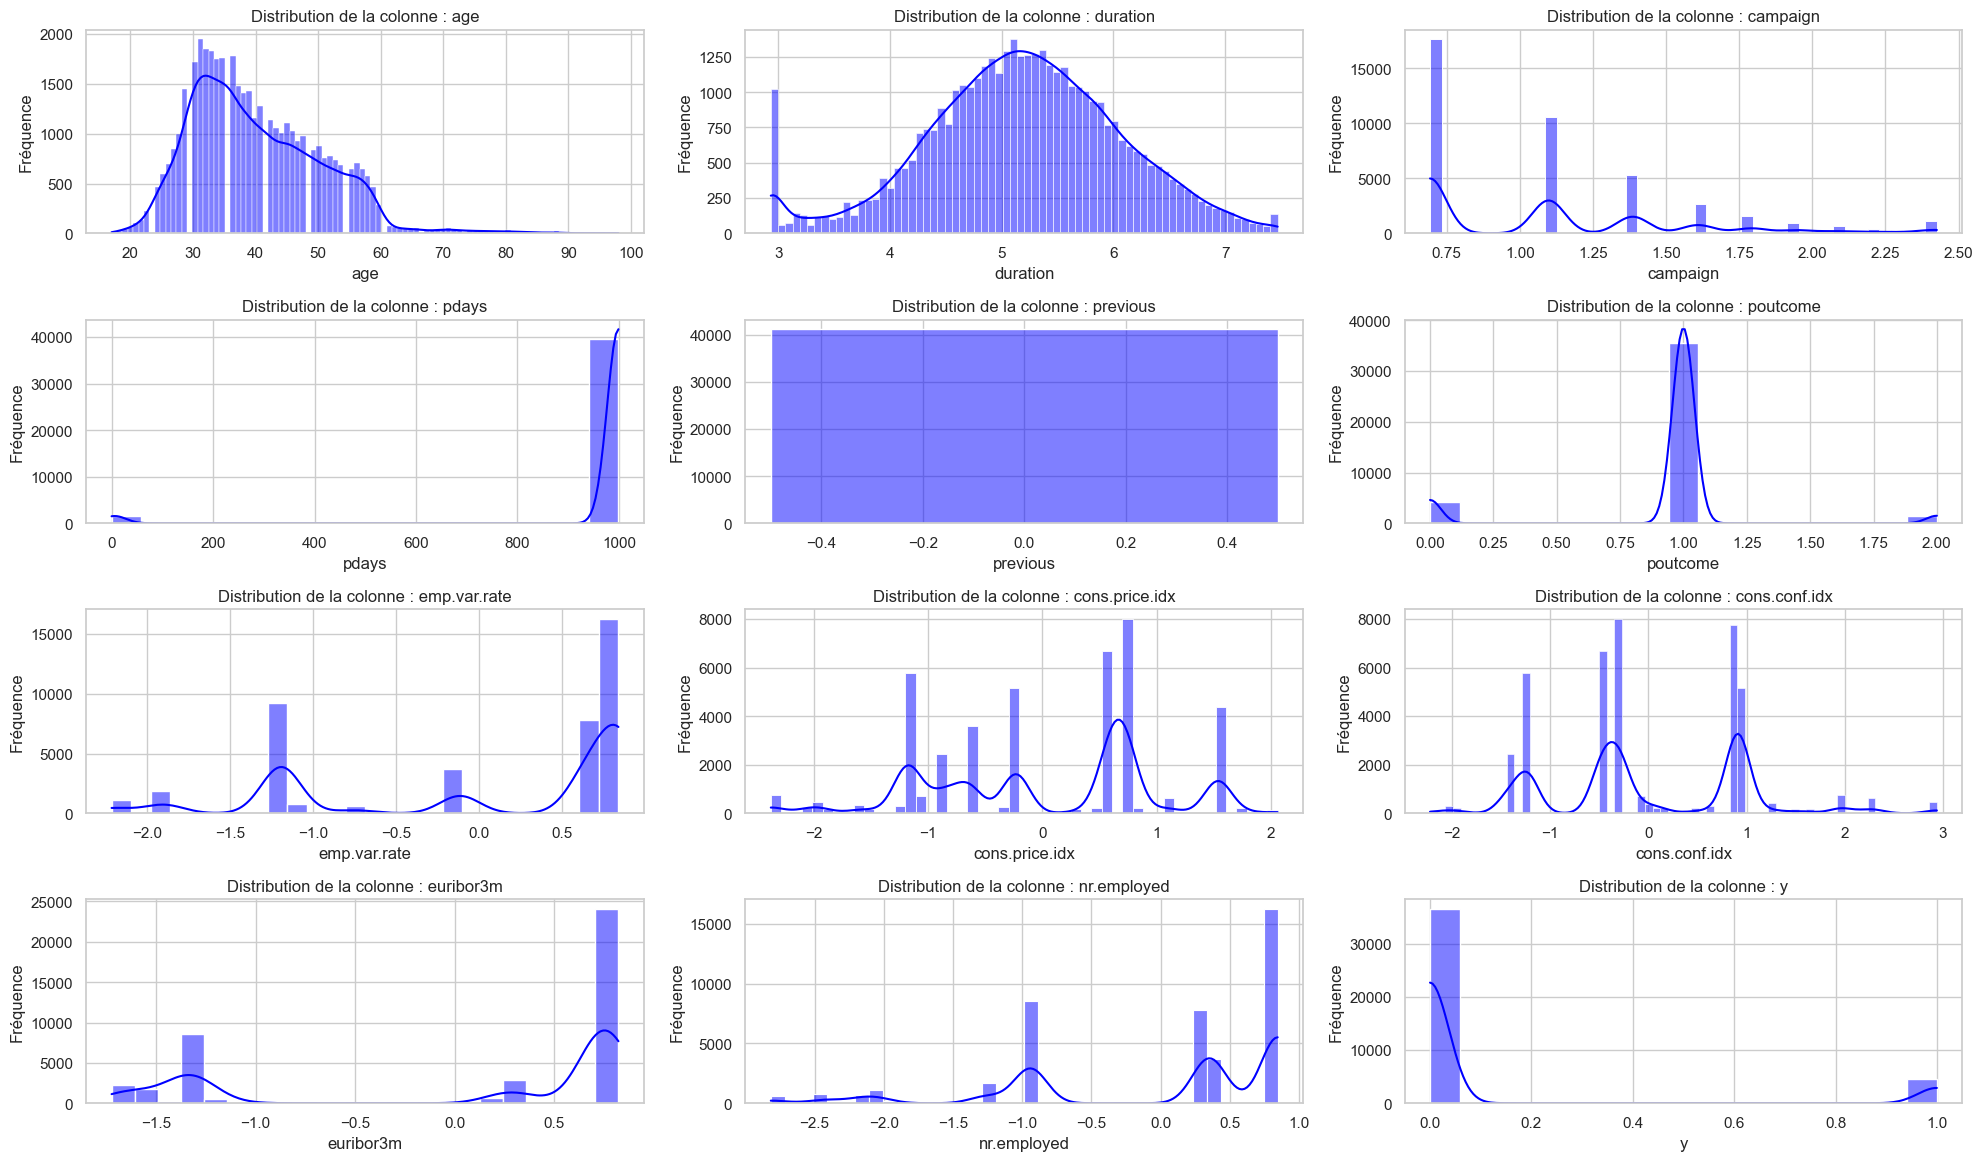

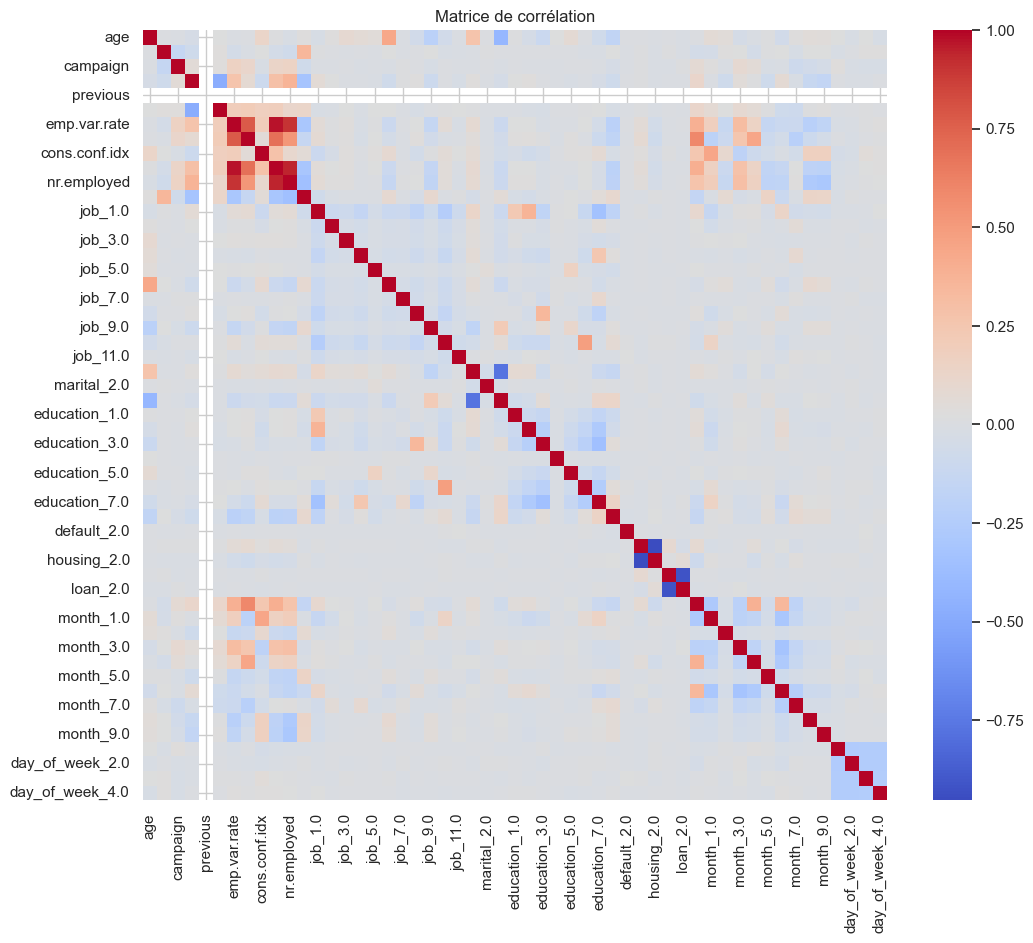

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Copier le DataFrame imputé pour les transformations
df = df_imputed.copy()

# Étape 1 : Transformation logarithmique des variables asymétriques
# Justification : Réduire l'impact des valeurs extrêmes sans perdre d'informations importantes.
asymmetric_cols = ['duration', 'campaign', 'previous']
for col in asymmetric_cols:
    df[col] = np.log1p(df[col])  # log1p(x) = log(1 + x)



# Étape 3 : Normalisation des variables économiques
# Justification : Les variables économiques sont sur des échelles différentes, donc une normalisation est nécessaire.
scaler = StandardScaler()
economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[economic_features] = scaler.fit_transform(df[economic_features])

# Étape 4 : Encodage One-Hot des variables catégorielles
# Justification : Utiliser One-Hot Encoding pour convertir les variables catégorielles en variables numériques.
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Étape 5 : Traitement des outliers
# Justification : Au lieu de supprimer les outliers, nous les limitons aux bornes calculées pour minimiser leur impact sans perdre d'informations.
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

outlier_cols = ['duration', 'campaign', 'previous']
for col in outlier_cols:
    treat_outliers(df, col)

# Étape 6 : Vérification des valeurs manquantes
print("Valeurs manquantes après nettoyage :")
print(df.isnull().sum())

# Étape 7 : Analyse des distributions des variables après transformation
# Justification : Visualiser la distribution des variables pour s'assurer que les transformations ont corrigé les asymétries.
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution de la colonne : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# Étape 8 : Analyse des corrélations
# Justification : Visualiser les corrélations entre les variables pour détecter d'éventuelles multicolinéarités.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings

warnings.filterwarnings('ignore')

# Assuming df_imputed is your clean DataFrame after KNN imputation

# Split data into features and target for both datasets
X_no_log = df_imputed.drop(columns=['y'])
y_no_log = df_imputed['y'].copy()
y_log = df_imputed['y'].copy()


# Apply log transformation for certain features
X_log = X_no_log.copy()
log_cols = ['duration', 'campaign', 'previous']
X_log[log_cols] = np.log1p(X_log[log_cols])

# Initialize SMOTE for balancing
smote = SMOTE(random_state=42)
X_no_log_resampled, y_no_log_resampled = smote.fit_resample(X_no_log, y_no_log)
X_log_resampled, y_log_resampled = smote.fit_resample(X_log, y_no_log)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Function to evaluate models
def evaluate_models(X, y, classifiers, skf):
    results = {}
    for name, model in classifiers.items():
        accuracies, f1_scores, roc_aucs = [], [], []
        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Train the model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate metrics
            accuracies.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
            roc_aucs.append(roc_auc_score(y_test, y_pred))

        # Store average metrics
        results[name] = {
            'Accuracy': np.mean(accuracies),
            'F1 Score': np.mean(f1_scores),
            'ROC AUC': np.mean(roc_aucs)
        }
    return results

# Evaluate models without log transformation
print("\nEvaluating Models (Without Log Transformation):")
results_no_log = evaluate_models(X_no_log_resampled, y_no_log_resampled, classifiers, skf)
for model_name, metrics in results_no_log.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, F1 Score: {metrics['F1 Score']:.4f}, ROC AUC: {metrics['ROC AUC']:.4f}")

# Evaluate models with log transformation
print("\nEvaluating Models (With Log Transformation):")
results_log = evaluate_models(X_log_resampled, y_log_resampled, classifiers, skf)
for model_name, metrics in results_log.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, F1 Score: {metrics['F1 Score']:.4f}, ROC AUC: {metrics['ROC AUC']:.4f}")



Evaluating Models (Without Log Transformation):


KeyboardInterrupt: 

### Smote before split

In [21]:
# Check the distribution of the target variable in the original DataFrame
print("Distribution of the target variable (y) in df_imputed:")
print(df_imputed['y'].value_counts())


Distribution of the target variable (y) in df_imputed:
y
0.0    36548
1.0     4640
Name: count, dtype: int64


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings

warnings.filterwarnings('ignore')

# Assuming df_imputed is your clean DataFrame after KNN imputation

# Split data into features and target
X = df_imputed.drop(columns=['y'])
y = df_imputed['y'].copy()

# Apply log transformation for certain features
X_log = X.copy()
log_cols = ['duration', 'campaign', 'previous']
X_log[log_cols] = np.log1p(X_log[log_cols])

# Initialize SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_log_resampled, y_log_resampled = smote.fit_resample(X_log, y)

# Verify class distribution after SMOTE
print("Class distribution after SMOTE (Without Log):")
print(y_resampled.value_counts())
print("\nClass distribution after SMOTE (With Log):")
print(y_log_resampled.value_counts())

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Function to evaluate models
def evaluate_models(X, y, classifiers, skf):
    results = {}
    for name, model in classifiers.items():
        accuracies, f1_scores, roc_aucs = [], [], []
        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Skip fold if y_train contains only one class
            if len(np.unique(y_train)) < 2:
                print(f"Skipping fold for {name} due to single-class training data.")
                continue

            # Train the model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate metrics
            accuracies.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
            roc_aucs.append(roc_auc_score(y_test, y_pred))

        # Store average metrics if evaluations were performed
        if accuracies:
            results[name] = {
                'Accuracy': np.mean(accuracies),
                'F1 Score': np.mean(f1_scores),
                'ROC AUC': np.mean(roc_aucs)
            }
        else:
            results[name] = {'Accuracy': None, 'F1 Score': None, 'ROC AUC': None}
    return results

# Evaluate models without log transformation
print("\nEvaluating Models (Without Log Transformation):")
results_no_log = evaluate_models(X_resampled, y_resampled, classifiers, skf)
for model_name, metrics in results_no_log.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']}, F1 Score: {metrics['F1 Score']}, ROC AUC: {metrics['ROC AUC']}")

# Evaluate models with log transformation
print("\nEvaluating Models (With Log Transformation):")
results_log = evaluate_models(X_log_resampled, y_log_resampled, classifiers, skf)
for model_name, metrics in results_log.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']}, F1 Score: {metrics['F1 Score']}, ROC AUC: {metrics['ROC AUC']}")


Class distribution after SMOTE (Without Log):
y
0.0    36548
1.0    36548
Name: count, dtype: int64

Class distribution after SMOTE (With Log):
y
0.0    36548
1.0    36548
Name: count, dtype: int64

Evaluating Models (Without Log Transformation):
Logistic Regression - Accuracy: 0.8591032250589992, F1 Score: 0.8600708151144074, ROC AUC: 0.8591031585047813
Random Forest - Accuracy: 0.9555790202248637, F1 Score: 0.9557115926402322, ROC AUC: 0.9555790592098908
Gradient Boosting - Accuracy: 0.9459752298339529, F1 Score: 0.9462497109839788, ROC AUC: 0.9459752369271687
XGBoost - Accuracy: 0.9525830362244776, F1 Score: 0.9523145973900359, ROC AUC: 0.9525830246559996

Evaluating Models (With Log Transformation):
Logistic Regression - Accuracy: 0.8762177114623034, F1 Score: 0.8792937028058134, ROC AUC: 0.8762175888799785
Random Forest - Accuracy: 0.9553874699389597, F1 Score: 0.9558135138305366, ROC AUC: 0.9553874134524166
Gradient Boosting - Accuracy: 0.9398052660372805, F1 Score: 0.94065774544

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from skopt import BayesSearchCV
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

# Define SMOTE and Stratified K-Fold
smote = SMOTE(random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Define hyperparameter search space for each model
search_spaces = {
    "Logistic Regression": {
        'C': (1e-4, 1e2, 'log-uniform'),
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        'n_estimators': (50, 500),
        'max_depth': (3, 20),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 20)
    },
    "Gradient Boosting": {
        'n_estimators': (50, 500),
        'learning_rate': (0.01, 0.3, 'log-uniform'),
        'max_depth': (3, 20),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 20)
    },
    "XGBoost": {
        'n_estimators': (50, 500),
        'learning_rate': (0.01, 0.3, 'log-uniform'),
        'max_depth': (3, 20),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0)
    }
}

# Function to perform Bayesian optimization with progress bar
def optimize_model(X, y, model, search_space):
    opt = BayesSearchCV(
        model,
        search_spaces=search_space,
        n_iter=30,
        cv=skf,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )
    with tqdm(total=30, desc="Bayesian Optimization Progress", leave=False) as pbar:
        def on_step(optim_result):
            pbar.update(1)
        opt.fit(X, y, callback=on_step)
    return opt.best_estimator_, opt.best_params_

# Prepare data
X_no_log = df_imputed.drop(columns=['y'])
y_no_log = df_imputed['y'].copy()

# Apply log transformation
X_log = X_no_log.copy()
log_cols = ['duration', 'campaign', 'previous']
X_log[log_cols] = np.log1p(X_log[log_cols])

# Resample using SMOTE
X_no_log_resampled, y_no_log_resampled = smote.fit_resample(X_no_log, y_no_log)
X_log_resampled, y_log_resampled = smote.fit_resample(X_log, y_no_log)

# Function to evaluate models with optimized hyperparameters and progress bar
def evaluate_optimized_models(X, y, classifiers, search_spaces):
    results = {}
    for name, model in tqdm(classifiers.items(), desc="Model Optimization", leave=False):
        print(f"\nOptimizing {name}...")
        best_model, best_params = optimize_model(X, y, model, search_spaces[name])
        print(f"Best hyperparameters for {name}: {best_params}")

        # Evaluate using Stratified K-Fold with progress bar
        accuracies, f1_scores, roc_aucs = [], [], []
        for train_idx, test_idx in tqdm(skf.split(X, y), desc=f"Evaluating {name}", leave=False, total=skf.get_n_splits()):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Train and predict
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)

            # Calculate metrics
            accuracies.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
            roc_aucs.append(roc_auc_score(y_test, y_pred))

        # Store average metrics
        results[name] = {
            'Accuracy': np.mean(accuracies),
            'F1 Score': np.mean(f1_scores),
            'ROC AUC': np.mean(roc_aucs)
        }
    return results

# Evaluate optimized models without log transformation
print("\nEvaluating Optimized Models (Without Log Transformation):")
results_no_log_optimized = evaluate_optimized_models(X_no_log_resampled, y_no_log_resampled, classifiers, search_spaces)
for model_name, metrics in results_no_log_optimized.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, F1 Score: {metrics['F1 Score']:.4f}, ROC AUC: {metrics['ROC AUC']:.4f}")

# Evaluate optimized models with log transformation
print("\nEvaluating Optimized Models (With Log Transformation):")
results_log_optimized = evaluate_optimized_models(X_log_resampled, y_log_resampled, classifiers, search_spaces)
for model_name, metrics in results_log_optimized.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, F1 Score: {metrics['F1 Score']:.4f}, ROC AUC: {metrics['ROC AUC']:.4f}")



Evaluating Optimized Models (Without Log Transformation):


Model Optimization:   0%|          | 0/4 [00:00<?, ?it/s]


Optimizing Logistic Regression...


Best hyperparameters for Logistic Regression: OrderedDict([('C', 0.18661840805567478), ('penalty', 'l2'), ('solver', 'liblinear')])


Model Optimization:  25%|██▌       | 1/4 [04:52<14:38, 292.89s/it]


Optimizing Random Forest...


Best hyperparameters for Random Forest: OrderedDict([('max_depth', 20), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])


Model Optimization:  50%|█████     | 2/4 [46:00<52:24, 1572.32s/it]


Optimizing Gradient Boosting...


Best hyperparameters for Gradient Boosting: OrderedDict([('learning_rate', 0.1214083024909187), ('max_depth', 19), ('min_samples_leaf', 4), ('min_samples_split', 5), ('n_estimators', 410)])


Model Optimization:  75%|███████▌  | 3/4 [5:09:23<2:14:30, 8070.37s/it]


Optimizing XGBoost...


Best hyperparameters for XGBoost: OrderedDict([('colsample_bytree', 0.5064397818909677), ('learning_rate', 0.016949228642611683), ('max_depth', 20), ('n_estimators', 493), ('subsample', 0.8066265226328565)])


Logistic Regression - Accuracy: 0.8642, F1 Score: 0.8655, ROC AUC: 0.8642
Random Forest - Accuracy: 0.9556, F1 Score: 0.9559, ROC AUC: 0.9556
Gradient Boosting - Accuracy: 0.9569, F1 Score: 0.9570, ROC AUC: 0.9569
XGBoost - Accuracy: 0.9568, F1 Score: 0.9565, ROC AUC: 0.9568

Evaluating Optimized Models (With Log Transformation):


Model Optimization:   0%|          | 0/4 [00:00<?, ?it/s]


Optimizing Logistic Regression...


Best hyperparameters for Logistic Regression: OrderedDict([('C', 0.29862991019581836), ('penalty', 'l2'), ('solver', 'liblinear')])


Model Optimization:  25%|██▌       | 1/4 [04:32<13:36, 272.15s/it]


Optimizing Random Forest...


Best hyperparameters for Random Forest: OrderedDict([('max_depth', 20), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])


Model Optimization:  50%|█████     | 2/4 [41:00<46:39, 1399.50s/it]


Optimizing Gradient Boosting...


Best hyperparameters for Gradient Boosting: OrderedDict([('learning_rate', 0.1214083024909187), ('max_depth', 19), ('min_samples_leaf', 4), ('min_samples_split', 5), ('n_estimators', 410)])


Model Optimization:  75%|███████▌  | 3/4 [4:45:54<2:04:30, 7470.13s/it]


Optimizing XGBoost...


Best hyperparameters for XGBoost: OrderedDict([('colsample_bytree', 0.5), ('learning_rate', 0.01), ('max_depth', 20), ('n_estimators', 500), ('subsample', 1.0)])


Logistic Regression - Accuracy: 0.8797, F1 Score: 0.8828, ROC AUC: 0.8797
Random Forest - Accuracy: 0.9537, F1 Score: 0.9544, ROC AUC: 0.9537
Gradient Boosting - Accuracy: 0.9564, F1 Score: 0.9566, ROC AUC: 0.9564
XGBoost - Accuracy: 0.9569, F1 Score: 0.9568, ROC AUC: 0.9569


    Best Overall Model: XGBoost (With Log Transformation)
        Highest Accuracy, F1 Score, and ROC AUC among all models.
        XGBoost handles class imbalance well (even before SMOTE) due to its robust boosting approach.
        The log transformation improved the model's performance slightly, indicating that handling skewness in features like duration, campaign, and previous was beneficial.

    Second Best Model: Gradient Boosting (With Log Transformation)
        Close performance to XGBoost, with similar metrics.
        Slightly faster training time compared to XGBoost, which might be advantageous if computational efficiency is a priority.

    Alternative Simple Model: Random Forest (With Log Transformation)
        If interpretability and speed are more important than a slight gain in performance, Random Forest could be a good compromise.

Conclusion

    Primary Recommendation: Use XGBoost with log-transformed features as the final model for this project due to its superior performance and handling of class imbalance.
    Secondary Option: If training time or interpretability is a concern, consider using Gradient Boosting or Random Forest as backup models.

# Test best xgboost

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import joblib
import pickle
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from tqdm import tqdm

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Load the data (assuming df_imputed is already clean)
df = df_imputed.copy()

# Split features and target
X = df.drop(columns=['y'])
y = df['y']

# Log transformation of skewed features
log_cols = ['duration', 'campaign', 'previous']
X[log_cols] = np.log1p(X[log_cols])

# Scale economic features
scaler = StandardScaler()
economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X[economic_features] = scaler.fit_transform(X[economic_features])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define the best models based on previous optimization
best_xgb = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.01,
    max_depth=20,
    n_estimators=500,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

best_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

best_gb = GradientBoostingClassifier(
    learning_rate=0.1214083024909187,
    max_depth=19,
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=410,
    random_state=42
)

# Define a function to train, evaluate, and save models
def evaluate_and_save_model(model, model_name):
    print(f"\nTraining the final {model_name} model...")
    model.fit(X_train, y_train)

    # Evaluate the model on the holdout set
    y_pred = model.predict(X_holdout)
    accuracy = accuracy_score(y_holdout, y_pred)
    f1 = f1_score(y_holdout, y_pred)
    roc_auc = roc_auc_score(y_holdout, y_pred)

    print(f"\nPerformance of {model_name} on the Holdout Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_holdout, y_pred))

    # Feature importance analysis using SHAP (if supported)
    if model_name in ["XGBoost", "Gradient Boosting"]:
        print(f"\nAnalyzing feature importance for {model_name} with SHAP values...")
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train)

        # Plot feature importance
        shap.summary_plot(shap_values, X_train, plot_type="bar")
        plt.show()

    # Save the model in both .joblib and .pickle formats
    print(f"\nSaving the final {model_name} model...")
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.joblib')
    with open(f'{model_name.lower().replace(" ", "_")}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

    print(f"{model_name} model saved successfully as '{model_name.lower().replace(' ', '_')}_model.joblib' and '{model_name.lower().replace(' ', '_')}_model.pkl'.")

# Evaluate and save the XGBoost model
evaluate_and_save_model(best_xgb, "XGBoost")

# Evaluate and save the Random Forest model
evaluate_and_save_model(best_rf, "Random Forest")

# Evaluate and save the Gradient Boosting model
evaluate_and_save_model(best_gb, "Gradient Boosting")



Training the final XGBoost model...

Performance on the Holdout Set:
Accuracy: 0.9591
F1 Score: 0.9590
ROC AUC: 0.9591

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      7310
         1.0       0.96      0.96      0.96      7310

    accuracy                           0.96     14620
   macro avg       0.96      0.96      0.96     14620
weighted avg       0.96      0.96      0.96     14620


Analyzing feature importance with SHAP values...


100%|===================| 58474/58476 [146:56<00:00]        

SystemError: <built-in function dense_tree_shap> returned a result with an error set


Validating and interpreting XGBoost...
Nested Cross-Validation ROC AUC for XGBoost: 0.9939

Performance of XGBoost on the Holdout Set:
Accuracy: 0.9591
F1 Score: 0.9590
ROC AUC: 0.9591

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      7310
         1.0       0.96      0.96      0.96      7310

    accuracy                           0.96     14620
   macro avg       0.96      0.96      0.96     14620
weighted avg       0.96      0.96      0.96     14620


Analyzing feature importance for XGBoost with SHAP values...


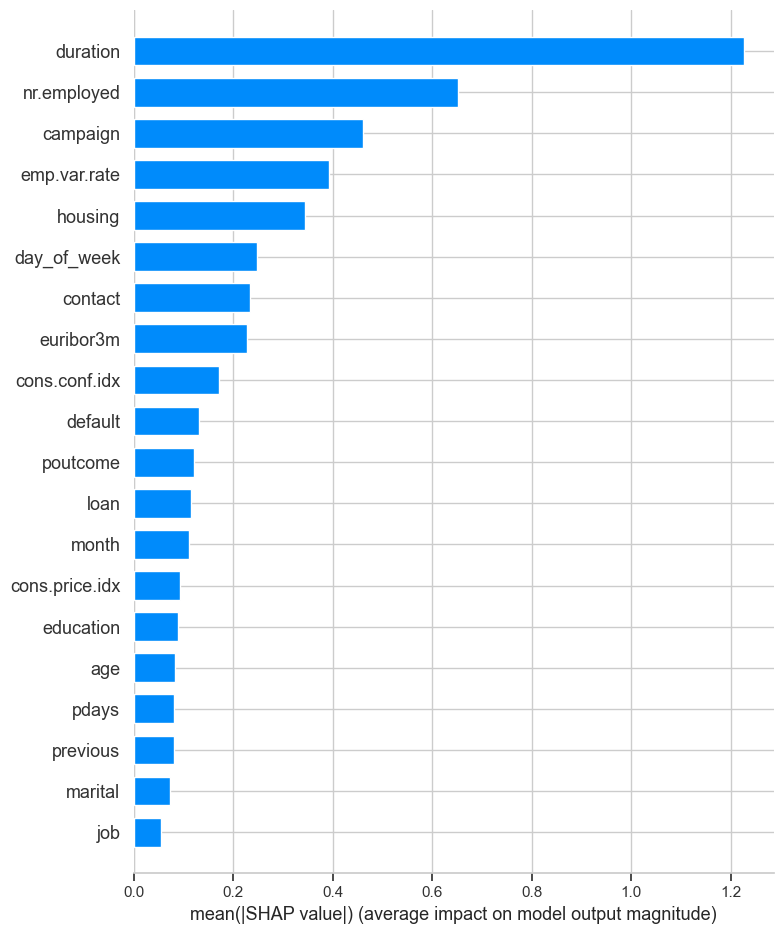

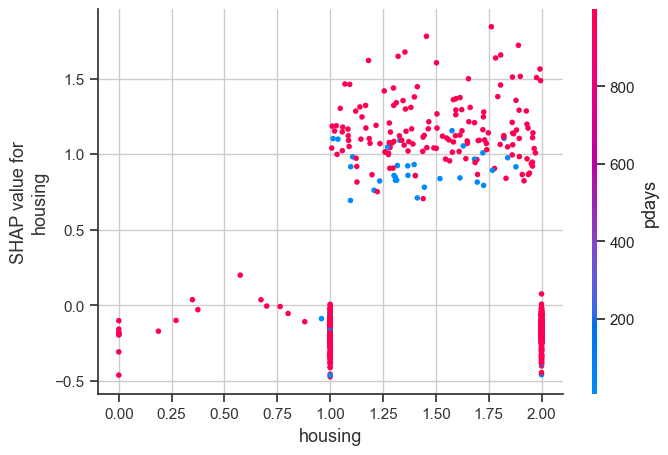

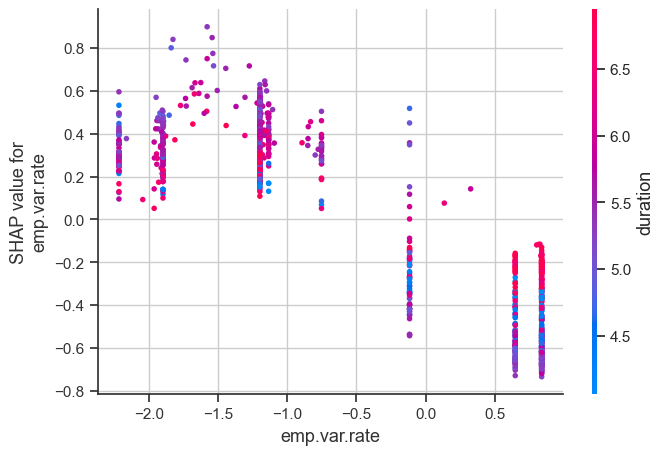

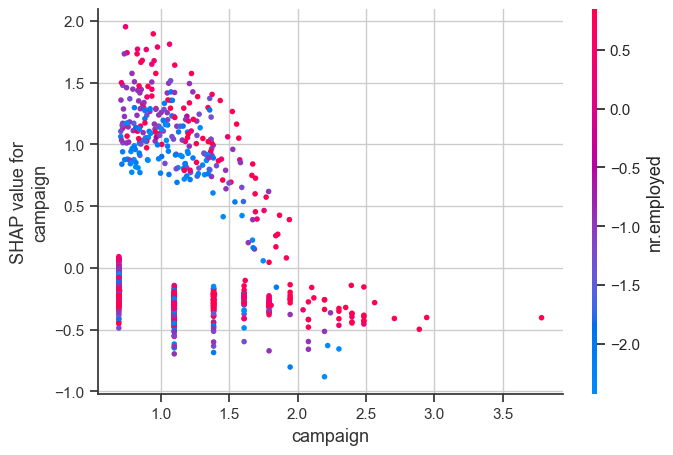

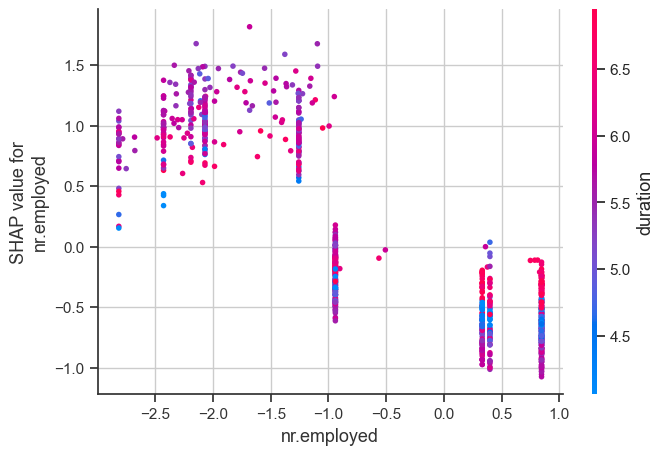

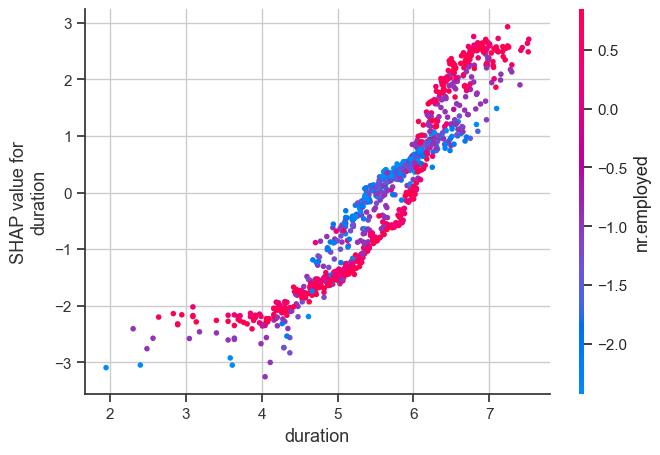


Saving the final XGBoost model...
XGBoost model saved successfully as 'xgboost_model.joblib' and 'xgboost_model.pkl'.

Validating and interpreting Random Forest...
Nested Cross-Validation ROC AUC for Random Forest: 0.9926

Performance of Random Forest on the Holdout Set:
Accuracy: 0.9549
F1 Score: 0.9555
ROC AUC: 0.9549

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      7310
         1.0       0.94      0.97      0.96      7310

    accuracy                           0.95     14620
   macro avg       0.96      0.95      0.95     14620
weighted avg       0.96      0.95      0.95     14620


Analyzing feature importance for Random Forest using traditional methods...


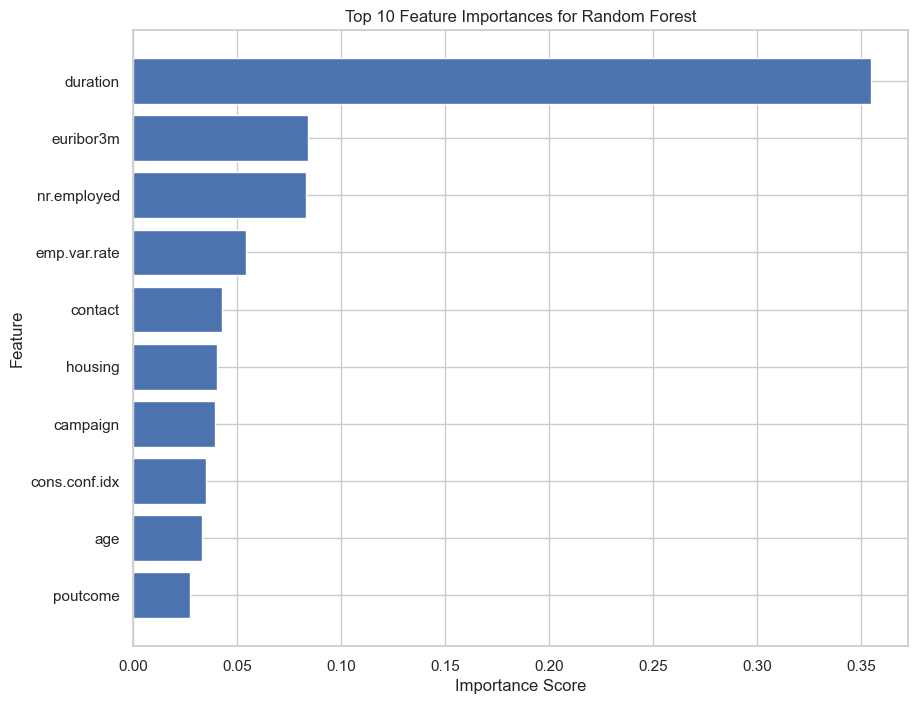


Saving the final Random Forest model...
Random Forest model saved successfully as 'random_forest_model.joblib' and 'random_forest_model.pkl'.

Validating and interpreting Gradient Boosting...
Nested Cross-Validation ROC AUC for Gradient Boosting: 0.9938

Performance of Gradient Boosting on the Holdout Set:
Accuracy: 0.9583
F1 Score: 0.9585
ROC AUC: 0.9583

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      7310
         1.0       0.95      0.96      0.96      7310

    accuracy                           0.96     14620
   macro avg       0.96      0.96      0.96     14620
weighted avg       0.96      0.96      0.96     14620


Analyzing feature importance for Gradient Boosting with SHAP values...


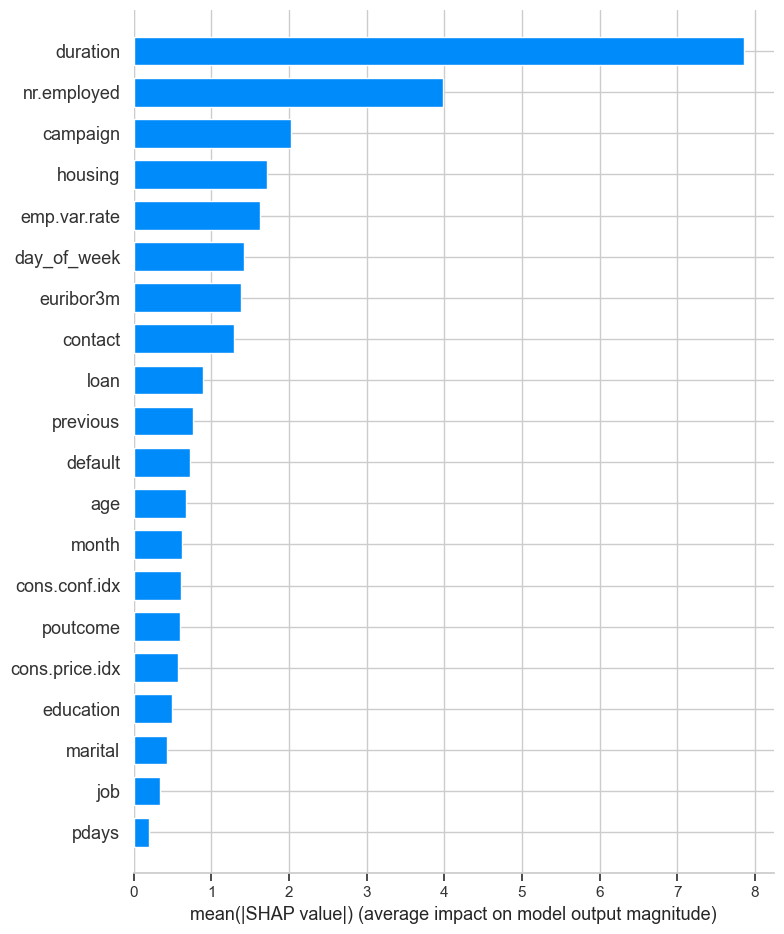

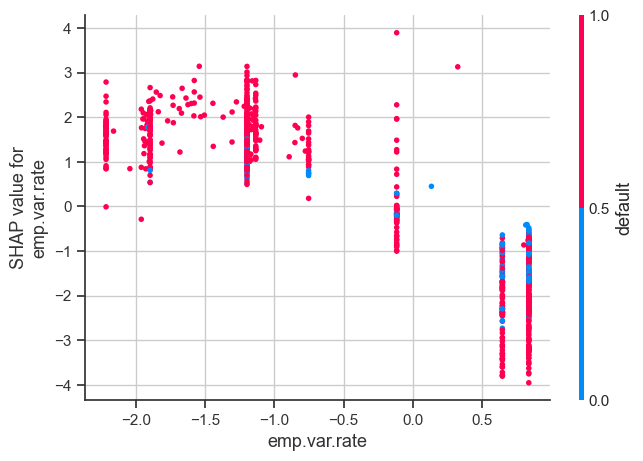

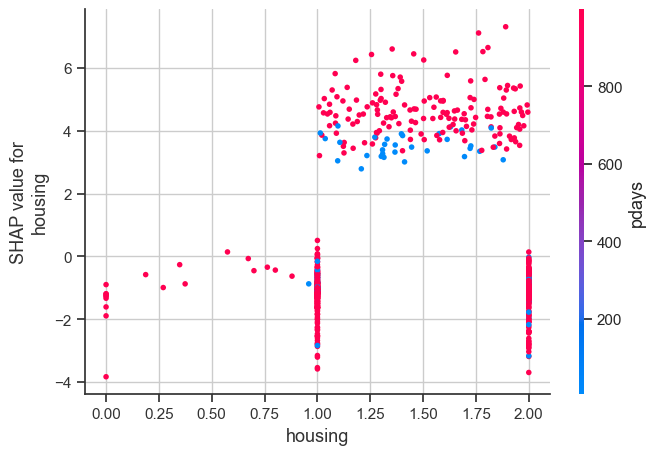

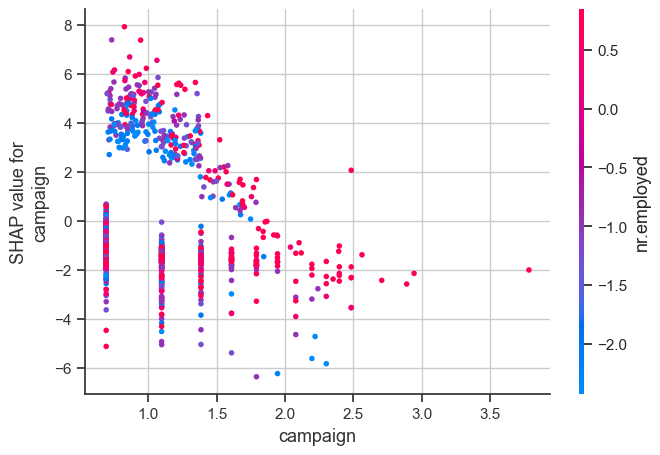

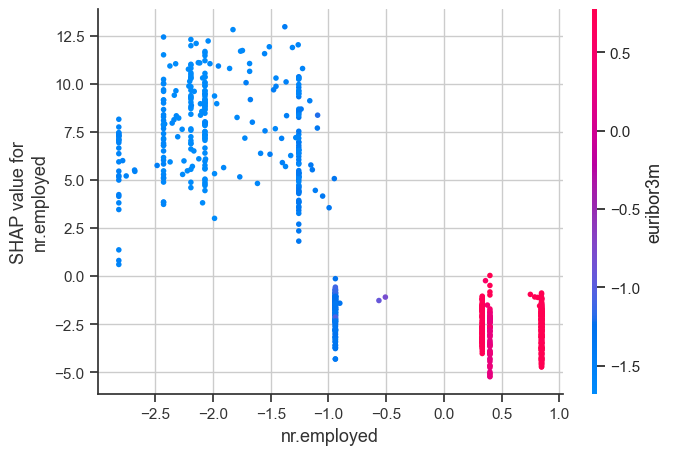

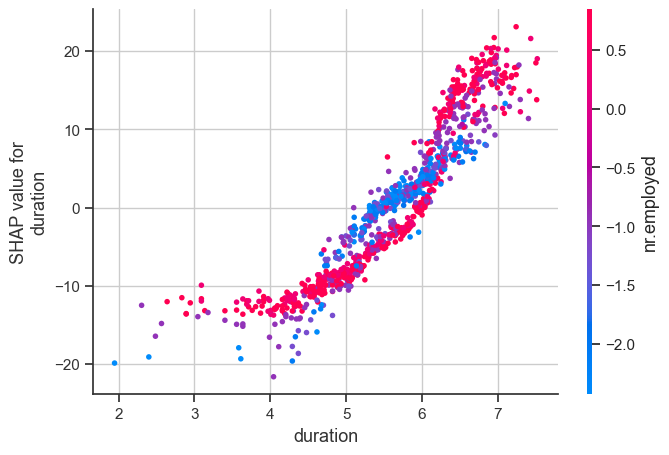


Saving the final Gradient Boosting model...
Gradient Boosting model saved successfully as 'gradient_boosting_model.joblib' and 'gradient_boosting_model.pkl'.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import joblib
import pickle
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
from tqdm import tqdm

def validate_and_interpret_model(model, model_name, X_train, y_train, X_holdout, y_holdout):
    print(f"\nValidating and interpreting {model_name}...")

    # Nested Cross-Validation
    skf_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=skf_outer, scoring='roc_auc', n_jobs=-1)
    print(f"Nested Cross-Validation ROC AUC for {model_name}: {np.mean(scores):.4f}")

    # Train on full training set and evaluate on holdout set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    accuracy = accuracy_score(y_holdout, y_pred)
    f1 = f1_score(y_holdout, y_pred)
    roc_auc = roc_auc_score(y_holdout, y_pred)

    print(f"\nPerformance of {model_name} on the Holdout Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_holdout, y_pred))

    # Feature Importance Analysis
    if model_name in ["XGBoost", "Gradient Boosting"]:
        print(f"\nAnalyzing feature importance for {model_name} with SHAP values...")

        # Use TreeExplainer for tree-based models
        explainer = shap.TreeExplainer(model)

        # Use a subset of the training data for SHAP analysis (e.g., 1000 samples)
        sample_X = X_train.sample(n=1000, random_state=42)
        shap_values = explainer(sample_X)

        # Plot feature importance using the SHAP values
        shap.summary_plot(shap_values.values, sample_X, plot_type="bar", show=True)
        
        # Plot SHAP dependence plots for top features
        top_features = np.argsort(np.abs(shap_values.values).mean(axis=0))[-5:]
        for feature in top_features:
            feature_name = sample_X.columns[feature]
            shap.dependence_plot(feature_name, shap_values.values, sample_X)
            plt.show()
    else:
        # Plot traditional feature importance for Random Forest
        print(f"\nAnalyzing feature importance for {model_name} using traditional methods...")
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 8))
        plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
        plt.gca().invert_yaxis()
        plt.title(f"Top 10 Feature Importances for {model_name}")
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.show()

    # Save the model in both .joblib and .pickle formats
    print(f"\nSaving the final {model_name} model...")
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.joblib')
    with open(f'{model_name.lower().replace(" ", "_")}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

    print(f"{model_name} model saved successfully as '{model_name.lower().replace(' ', '_')}_model.joblib' and '{model_name.lower().replace(' ', '_')}_model.pkl'.")

# Validate and interpret the XGBoost model
validate_and_interpret_model(best_xgb, "XGBoost", X_train, y_train, X_holdout, y_holdout)

# Validate and interpret the Random Forest model
validate_and_interpret_model(best_rf, "Random Forest", X_train, y_train, X_holdout, y_holdout)

# Validate and interpret the Gradient Boosting model
validate_and_interpret_model(best_gb, "Gradient Boosting", X_train, y_train, X_holdout, y_holdout)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import joblib
import pickle
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
from tqdm import tqdm
from matplotlib.backends.backend_pdf import PdfPages

def validate_and_interpret_model(model, model_name, X_train, y_train, X_holdout, y_holdout):
    print(f"\nValidating and interpreting {model_name}...")

    # Nested Cross-Validation
    skf_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=skf_outer, scoring='roc_auc', n_jobs=-1)
    print(f"Nested Cross-Validation ROC AUC for {model_name}: {np.mean(scores):.4f}")

    # Train on full training set and evaluate on holdout set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    accuracy = accuracy_score(y_holdout, y_pred)
    f1 = f1_score(y_holdout, y_pred)
    roc_auc = roc_auc_score(y_holdout, y_pred)

    print(f"\nPerformance of {model_name} on the Holdout Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_holdout, y_pred))

    # Open a PDF to save all plots
    pdf_filename = f"{model_name.lower().replace(' ', '_')}_shap_analysis.pdf"
    with PdfPages(pdf_filename) as pdf:
        # Feature Importance Analysis
        if model_name in ["XGBoost", "Gradient Boosting"]:
            print(f"\nAnalyzing feature importance for {model_name} with SHAP values...")

            # Use TreeExplainer for tree-based models
            explainer = shap.TreeExplainer(model)
            sample_X = X_train.sample(n=1000, random_state=42)
            shap_values = explainer(sample_X)

            # SHAP Summary Plot
            plt.figure()
            shap.summary_plot(shap_values, sample_X, plot_type="bar", show=False)
            plt.title(f"SHAP Summary Plot for {model_name}")
            pdf.savefig()
            plt.close()

            # SHAP Dependence Plots for the top 5 features
            top_features = np.argsort(np.abs(shap_values.values).mean(axis=0))[-5:]
            for feature_index in top_features:
                feature_name = sample_X.columns[feature_index]
                plt.figure()
                # Use the Explanation object directly for the dependence plot
                shap.dependence_plot(feature_name, shap_values, sample_X, show=False)
                plt.title(f"SHAP Dependence Plot for {feature_name} ({model_name})")
                pdf.savefig()
                plt.close()

        else:
            # Traditional feature importance for Random Forest
            print(f"\nAnalyzing feature importance for {model_name} using traditional methods...")
            feature_importances = model.feature_importances_
            importance_df = pd.DataFrame({
                'Feature': X_train.columns,
                'Importance': feature_importances
            }).sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, 8))
            plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
            plt.gca().invert_yaxis()
            plt.title(f"Top 10 Feature Importances for {model_name}")
            plt.xlabel("Importance Score")
            plt.ylabel("Feature")
            pdf.savefig()
            plt.close()

        print(f"All analysis plots for {model_name} have been saved to '{pdf_filename}'.")

    # Save the model in both .joblib and .pickle formats
    print(f"\nSaving the final {model_name} model...")
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.joblib')
    with open(f'{model_name.lower().replace(" ", "_")}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

    print(f"{model_name} model saved successfully as '{model_name.lower().replace(' ', '_')}_model.joblib' and '{model_name.lower().replace(' ', '_')}_model.pkl'.")

# Validate and interpret the models
validate_and_interpret_model(best_xgb, "XGBoost", X_train, y_train, X_holdout, y_holdout)
validate_and_interpret_model(best_rf, "Random Forest", X_train, y_train, X_holdout, y_holdout)
validate_and_interpret_model(best_gb, "Gradient Boosting", X_train, y_train, X_holdout, y_holdout)



Validating and interpreting XGBoost...
Nested Cross-Validation ROC AUC for XGBoost: 0.9939

Performance of XGBoost on the Holdout Set:
Accuracy: 0.9591
F1 Score: 0.9590
ROC AUC: 0.9591

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      7310
         1.0       0.96      0.96      0.96      7310

    accuracy                           0.96     14620
   macro avg       0.96      0.96      0.96     14620
weighted avg       0.96      0.96      0.96     14620


Analyzing feature importance for XGBoost with SHAP values...


TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

<Figure size 640x480 with 0 Axes>